In [1]:
library(car)
options(repr.plot.width=11, repr.plot.height=6)

data=read.csv2("final reults.csv",row.names=1)
data=data[!((rownames(data)=="EM_45c")|(rownames(data)=="LF_18a")|(rownames(data)=="LF_31b")),]

In [2]:
data_2=data[!data$process_2=="undefined",]
data_6=data[!data$process_6=="undefined",]

In [3]:
data$process_6=factor(data$process_6, levels=c("undefined","Recordar","Comprender","Aplicar","Analizar","Evaluar","Crear"))
data$process_2=factor(data$process_2, levels=c("undefined","Retener","Transferir"))

data_6$process_6=factor(data_6$process_6, levels=c("Recordar","Comprender","Aplicar","Analizar","Evaluar","Crear"))
data_2$process_2=factor(data_2$process_2, levels=c("Retener","Transferir"))

colnames(data)
summary(data)

[1] "process_6"      "process_2"      "IRT_difficulty" "KNN"           
[5] "RBF_SVM"        "Rand_Forest"    "AdaBoost"       "Naive_Bayes"   
[9] "QDA"

      process_6       process_2   IRT_difficulty         KNN        
 undefined :50   undefined :  4   Min.   :-2.0000   Min.   :0.0000  
 Recordar  :12   Retener   : 12   1st Qu.:-0.2010   1st Qu.:0.5000  
 Comprender:42   Transferir:115   Median : 0.4050   Median :0.7670  
 Aplicar   : 3                    Mean   : 0.4102   Mean   :0.7214  
 Analizar  :17                    3rd Qu.: 1.0000   3rd Qu.:1.0000  
 Evaluar   : 4                    Max.   : 3.0000   Max.   :1.0000  
 Crear     : 3                                                      
    RBF_SVM        Rand_Forest        AdaBoost       Naive_Bayes    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5000   1st Qu.:0.3330   1st Qu.:0.3665   1st Qu.:0.3000  
 Median :0.7330   Median :0.6430   Median :0.6670   Median :0.5000  
 Mean   :0.6971   Mean   :0.5293   Mean   :0.6421   Mean   :0.4913  
 3rd Qu.:1.0000   3rd Qu.:0.8835   3rd Qu.:1.0000   3rd Qu.:0.7000  
 Max.   :1.0000   Max.   :1.0000  

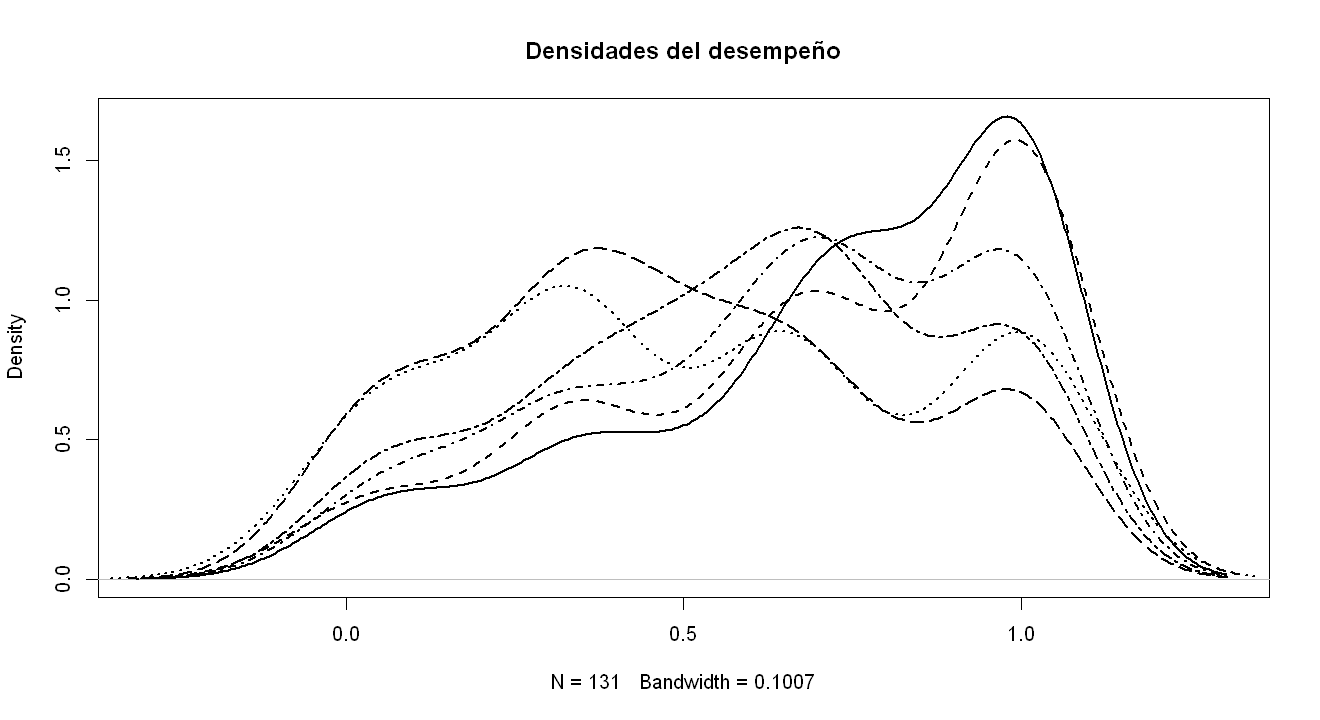

In [4]:
plot(density(data$KNN),col="black", lwd=2, lty=1, main="Densidades del desempeño")
lines(density(data$RBF_SVM),col="black", lwd=2, lty=2)
lines(density(data$Rand_Forest),col="black", lwd=2, lty=3)
lines(density(data$AdaBoost),col="black", lwd=2, lty=4)
lines(density(data$Naive_Bayes),col="black", lwd=2, lty=5)
lines(density(data$QDA),col="black", lwd=2, lty=6)

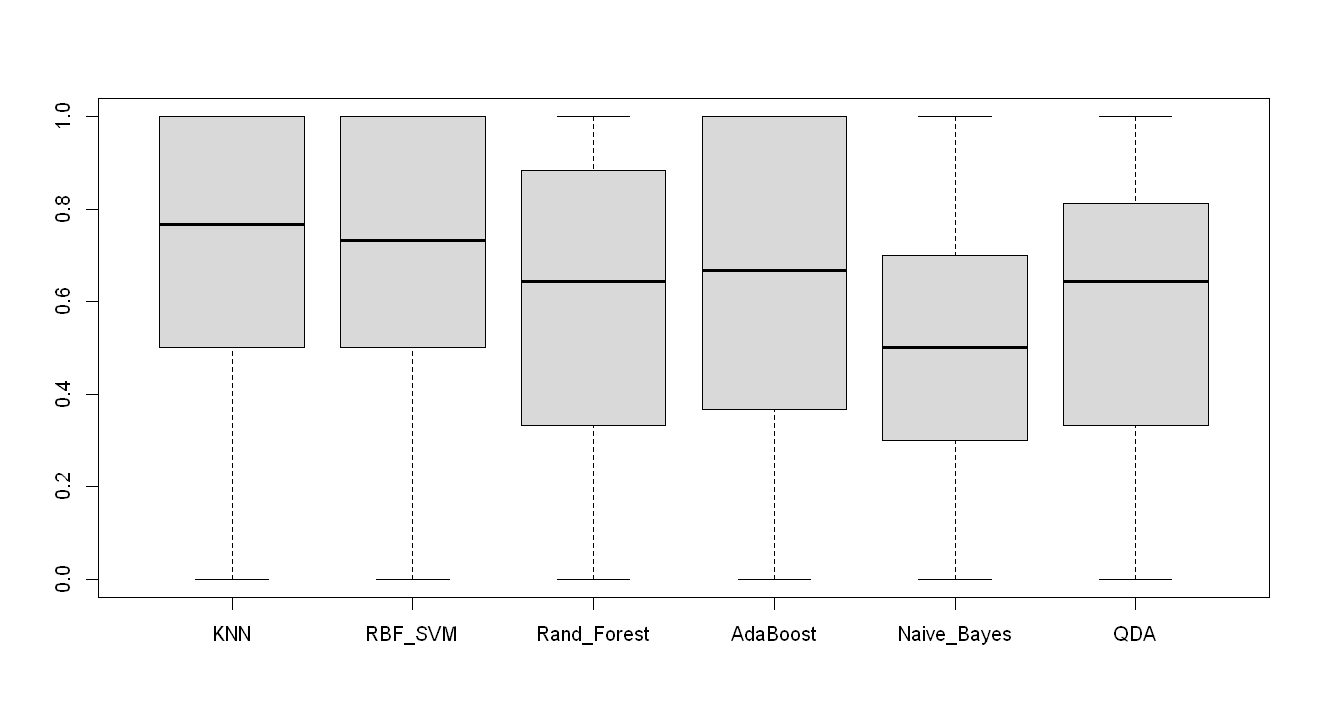

In [5]:
boxplot(data[,c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA")], col="gray85")

In [6]:
t.test(IRT_difficulty ~ process_2, data=data_2)
t.test(KNN ~ process_2, data=data_2)
t.test(RBF_SVM ~ process_2, data=data_2)
t.test(Rand_Forest ~ process_2, data=data_2)
t.test(AdaBoost ~ process_2, data=data_2)
t.test(Naive_Bayes ~ process_2, data=data_2)
t.test(QDA ~ process_2, data=data_2)


	Welch Two Sample t-test

data:  IRT_difficulty by process_2
t = 0.94791, df = 14.085, p-value = 0.3592
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3214324  0.8310962
sample estimates:
   mean in group Retener mean in group Transferir 
               0.6116667                0.3568348 



	Welch Two Sample t-test

data:  KNN by process_2
t = -1.0594, df = 12.694, p-value = 0.3092
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3283798  0.1126392
sample estimates:
   mean in group Retener mean in group Transferir 
               0.6294167                0.7372870 



	Welch Two Sample t-test

data:  RBF_SVM by process_2
t = -0.90752, df = 12.604, p-value = 0.3812
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3419174  0.1400856
sample estimates:
   mean in group Retener mean in group Transferir 
               0.6106667                0.7115826 



	Welch Two Sample t-test

data:  Rand_Forest by process_2
t = 0.18652, df = 12.855, p-value = 0.8549
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2277202  0.2707028
sample estimates:
   mean in group Retener mean in group Transferir 
               0.5515000                0.5300087 



	Welch Two Sample t-test

data:  AdaBoost by process_2
t = -0.51151, df = 13.328, p-value = 0.6174
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2490068  0.1534734
sample estimates:
   mean in group Retener mean in group Transferir 
               0.5988333                0.6466000 



	Welch Two Sample t-test

data:  Naive_Bayes by process_2
t = -0.79219, df = 14.023, p-value = 0.4414
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2547664  0.1173142
sample estimates:
   mean in group Retener mean in group Transferir 
               0.4285000                0.4972261 



	Welch Two Sample t-test

data:  QDA by process_2
t = -1.2009, df = 14.308, p-value = 0.2493
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.26519730  0.07457556
sample estimates:
   mean in group Retener mean in group Transferir 
               0.5127500                0.6080609 


In [7]:
cor.test(data$IRT_difficulty, data$KNN)
cor.test(data$IRT_difficulty, data$RBF_SVM)
cor.test(data$IRT_difficulty, data$Rand_Forest)
cor.test(data$IRT_difficulty, data$AdaBoost)
cor.test(data$IRT_difficulty, data$Naive_Bayes)
cor.test(data$IRT_difficulty, data$QDA)


	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$KNN
t = -0.21171, df = 129, p-value = 0.8327
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1895566  0.1533788
sample estimates:
        cor 
-0.01863703 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$RBF_SVM
t = -2.2204, df = 129, p-value = 0.02814
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.35180869 -0.02102738
sample estimates:
       cor 
-0.1918609 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$Rand_Forest
t = 1.5888, df = 129, p-value = 0.1146
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03379468  0.30286269
sample estimates:
      cor 
0.1385338 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$AdaBoost
t = -0.22314, df = 129, p-value = 0.8238
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1905262  0.1523963
sample estimates:
        cor 
-0.01964261 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$Naive_Bayes
t = -0.43806, df = 129, p-value = 0.6621
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2086866  0.1338698
sample estimates:
        cor 
-0.03854066 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$QDA
t = -0.28262, df = 129, p-value = 0.7779
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1955663  0.1472787
sample estimates:
        cor 
-0.02487522 


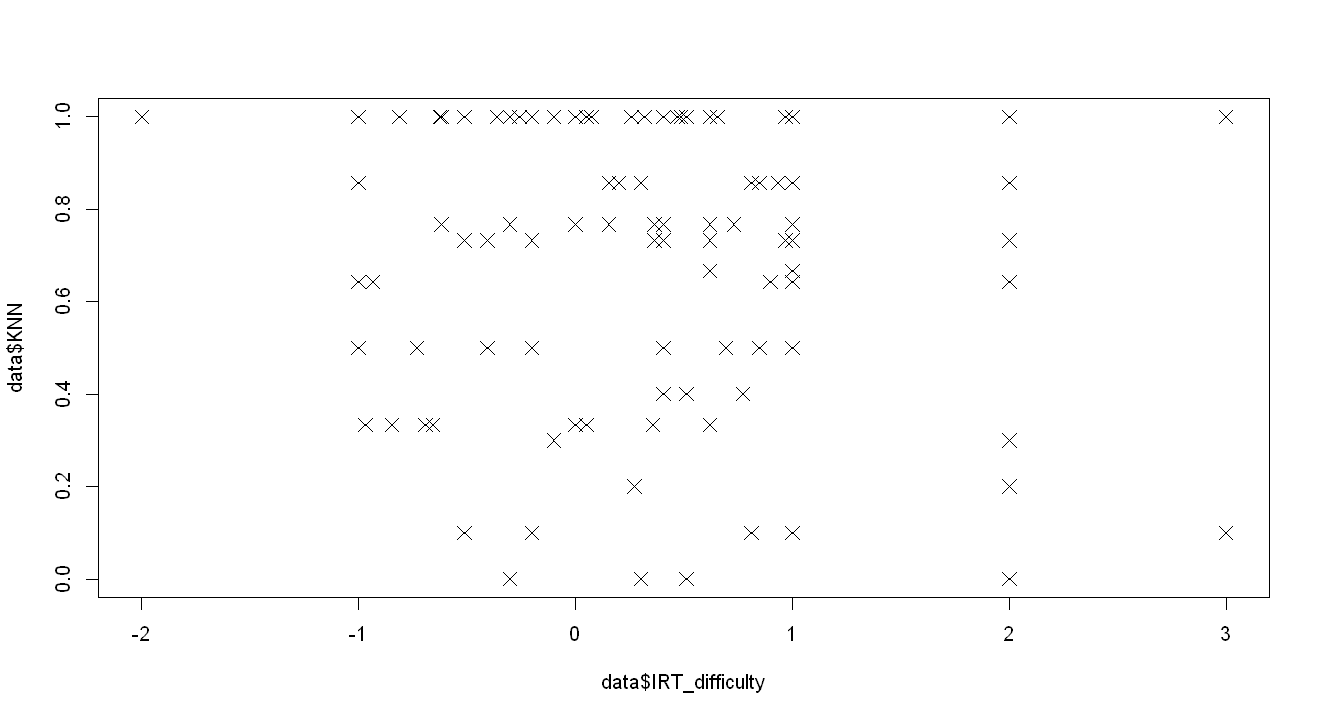

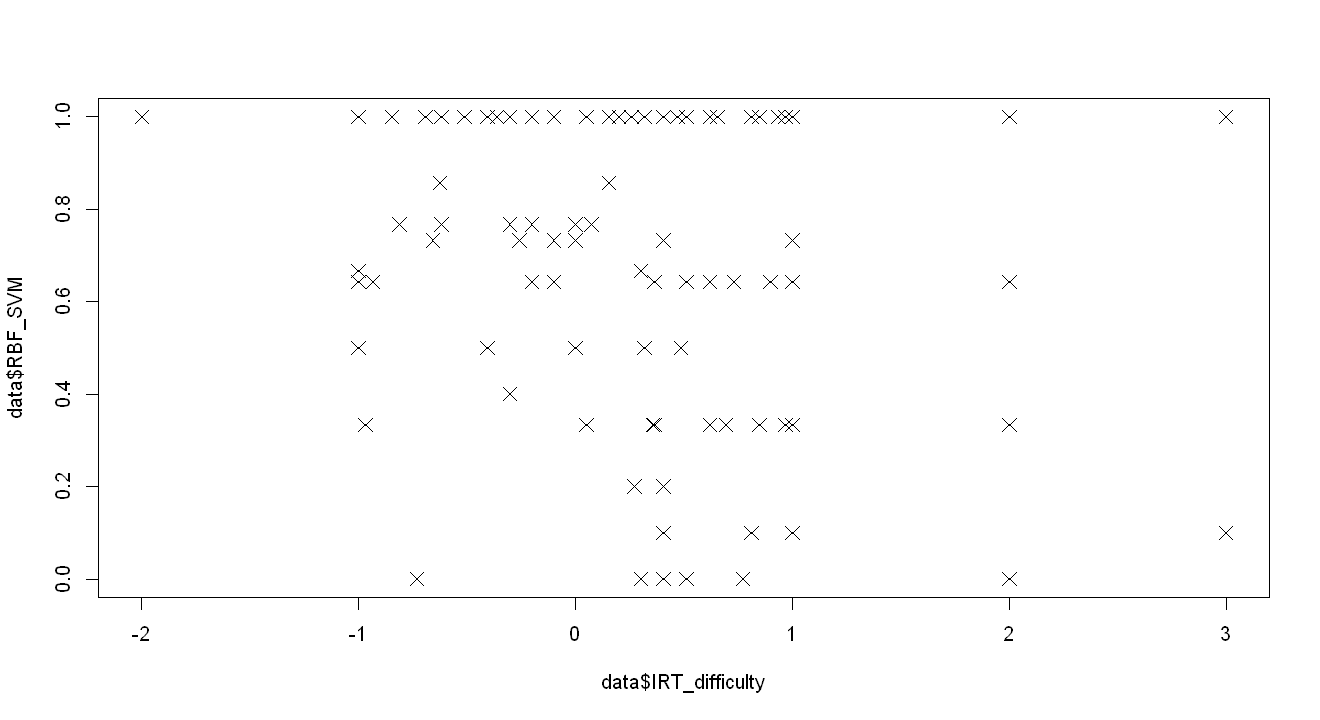

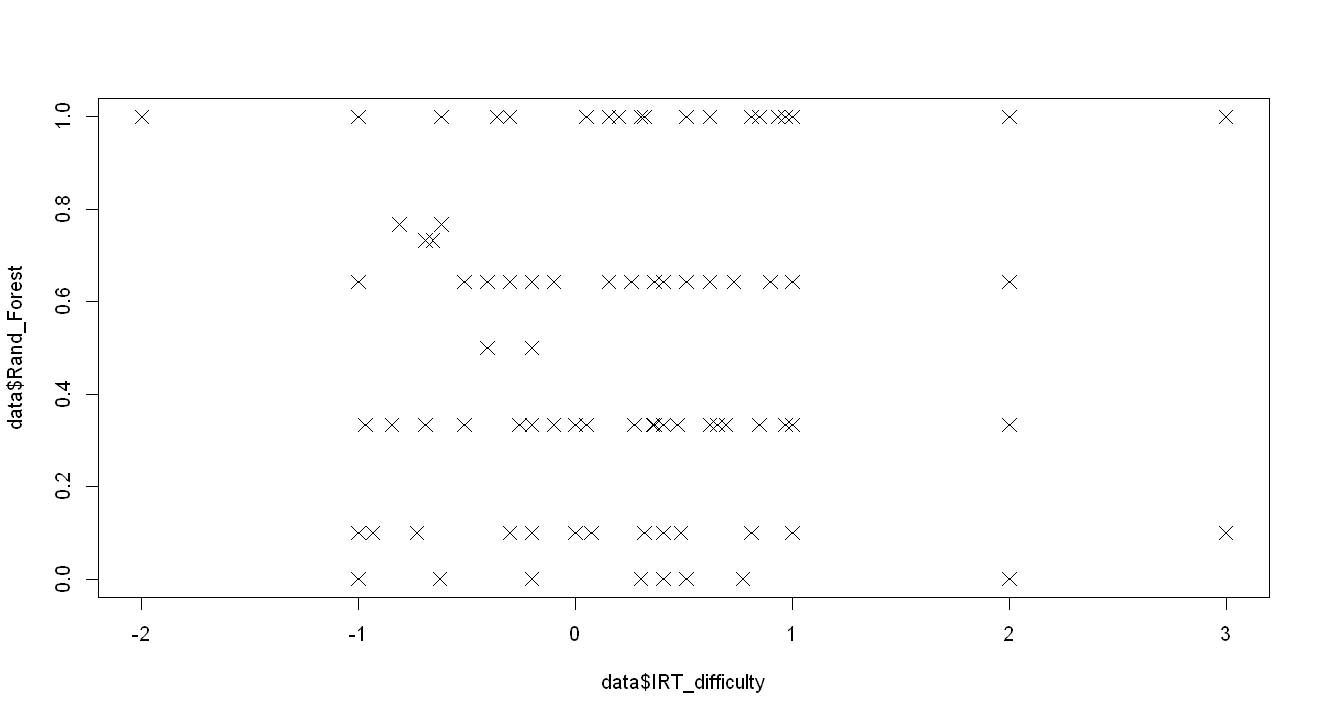

In [8]:
plot(data$IRT_difficulty, data$KNN, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
plot(data$IRT_difficulty, data$RBF_SVM, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
plot(data$IRT_difficulty, data$Rand_Forest, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
# plot(data$IRT_difficulty, data$AdaBoost, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
# plot(data$IRT_difficulty, data$Naive_Bayes, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
# plot(data$IRT_difficulty, data$QDA, pch=(data_2$process_2=="remember")*16+4, cex=1.5)


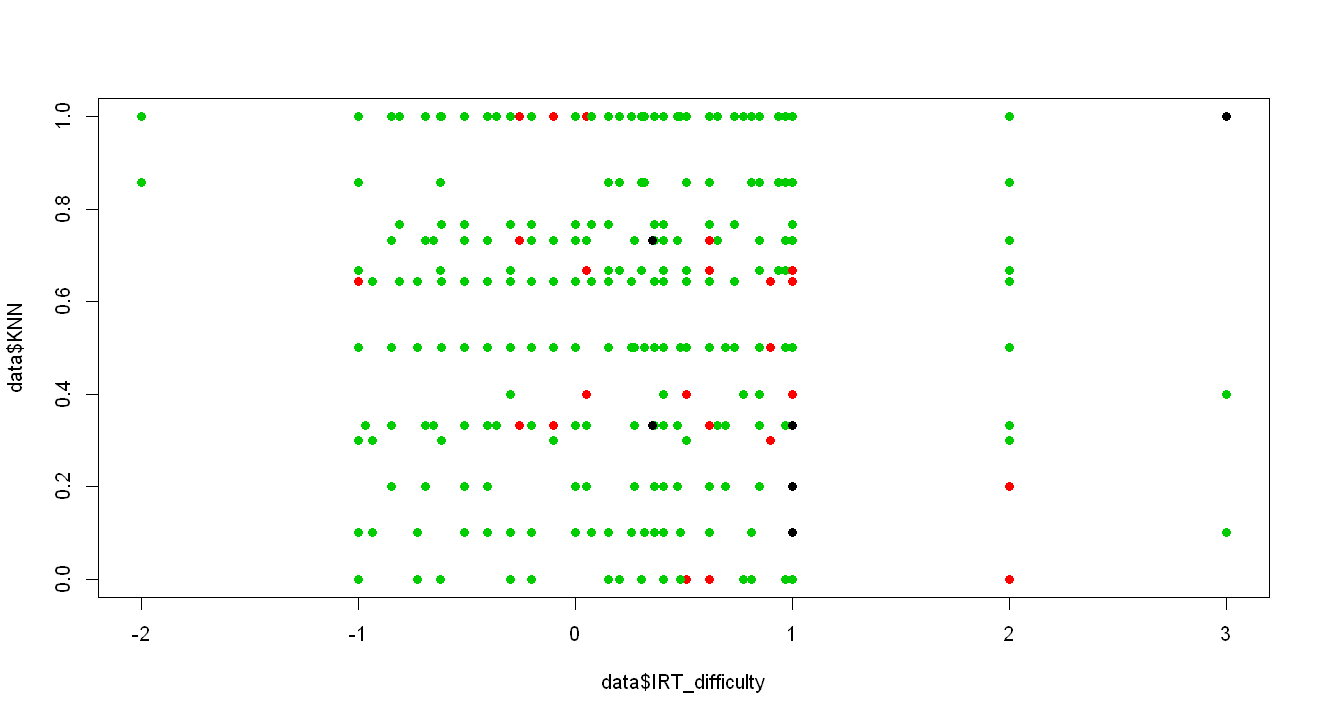

In [9]:
plot(data$IRT_difficulty, data$KNN, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$RBF_SVM, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$Rand_Forest, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$AdaBoost, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$Naive_Bayes, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$QDA, pch=16, col=data$process_2)

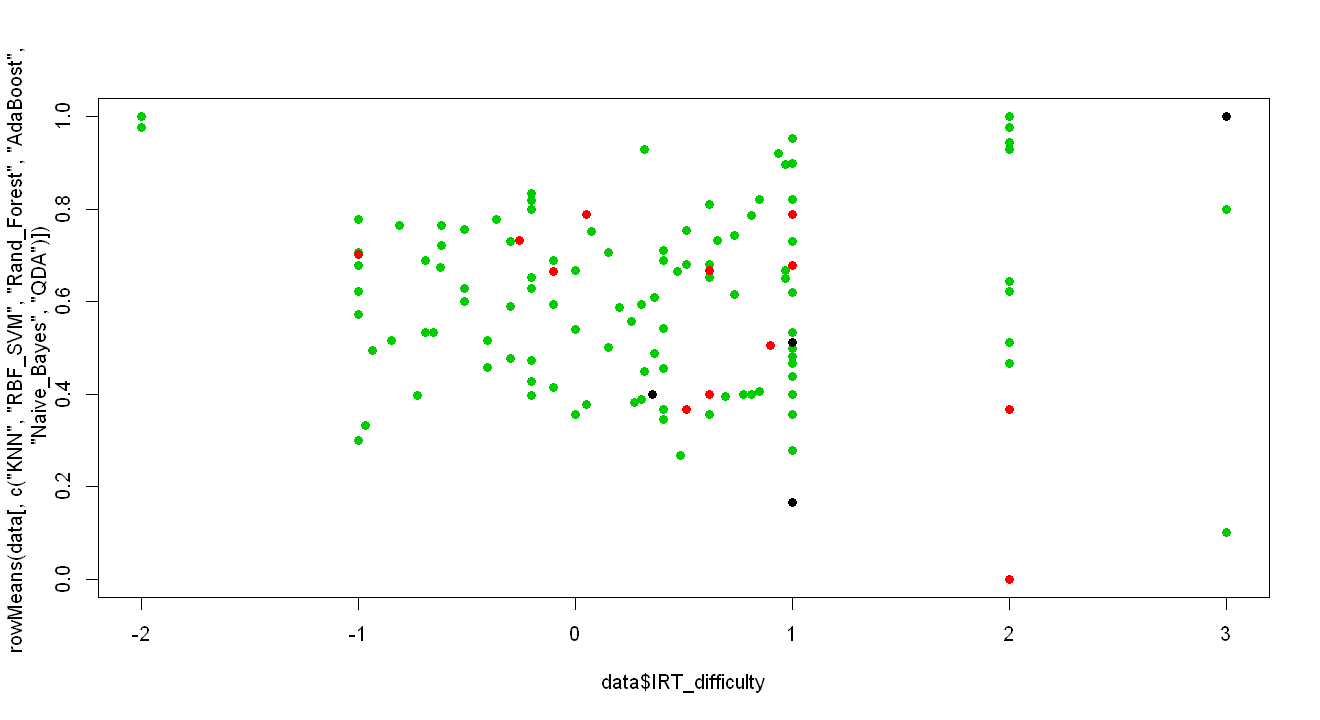

In [10]:
plot(data$IRT_difficulty, 
	rowMeans(data[,c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA")]),
	pch=16, col=data$process_2)

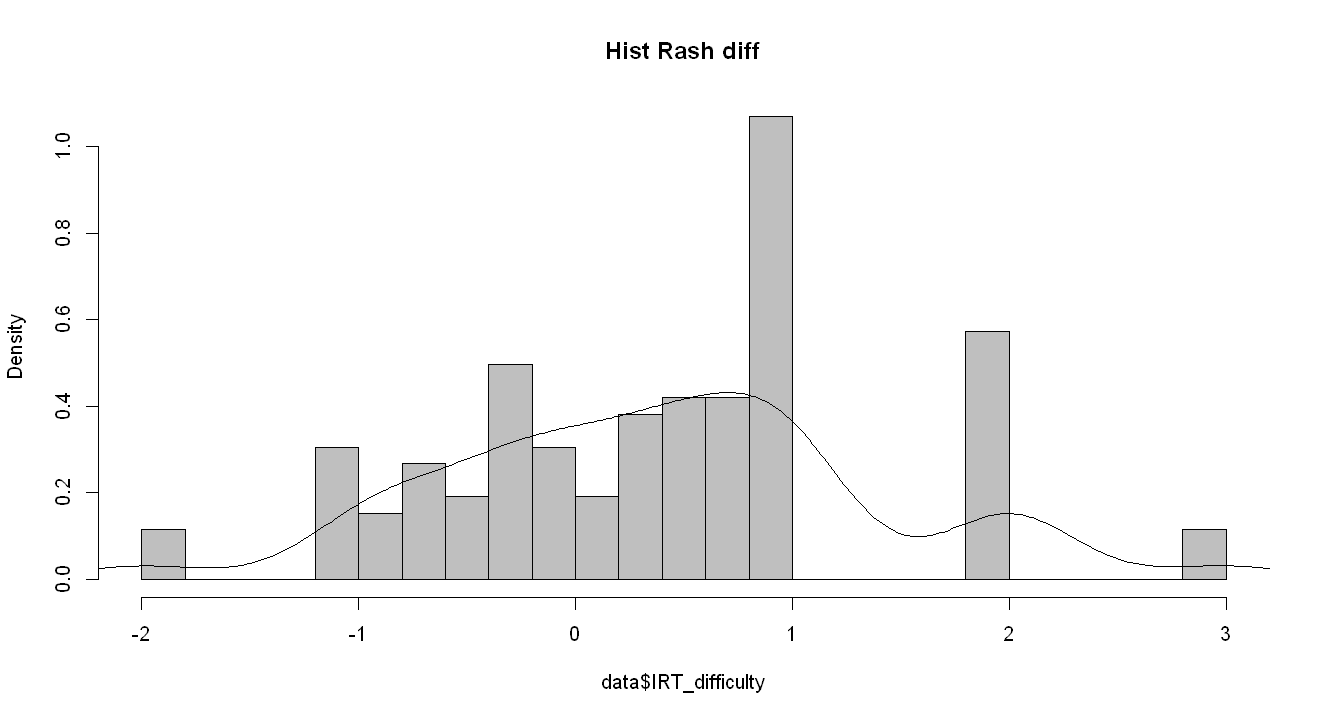

In [11]:
hist(data$IRT_difficulty, 
	col="gray75", 
	freq=FALSE,
	breaks=20,
	main="Hist Rash diff")
lines(density(data$IRT_difficulty))

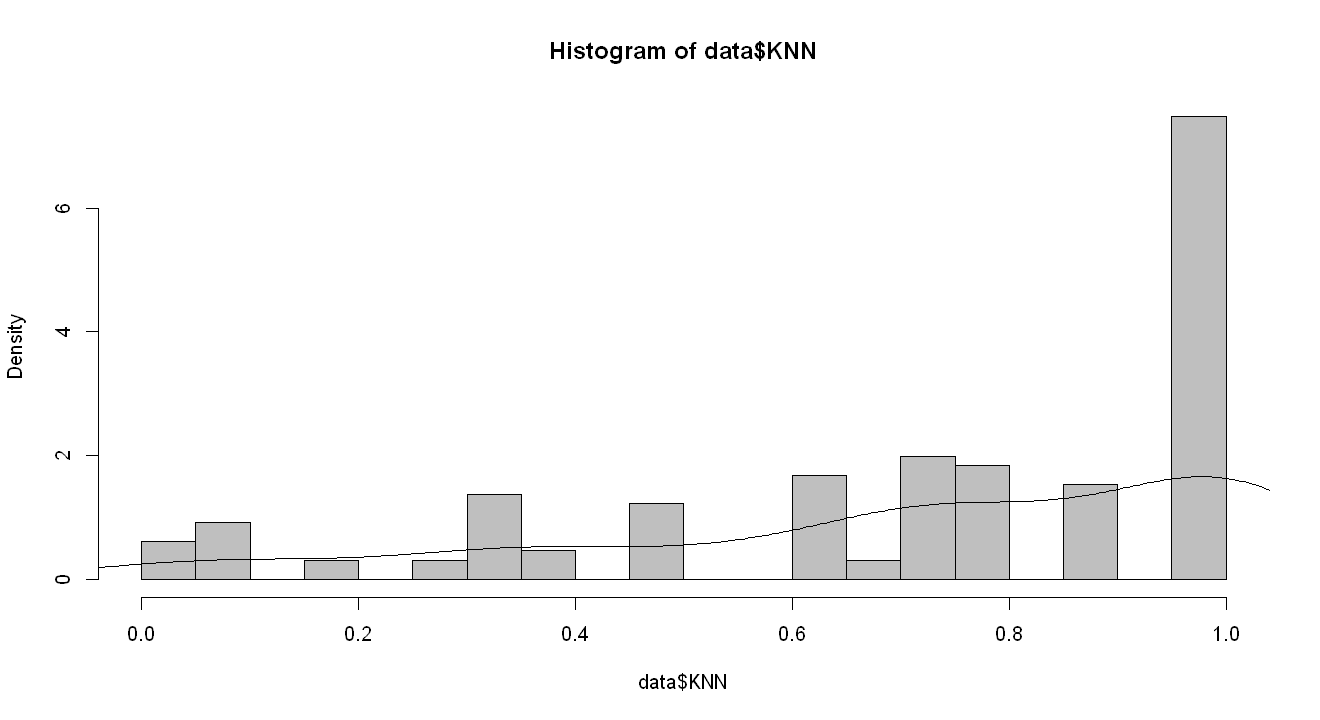

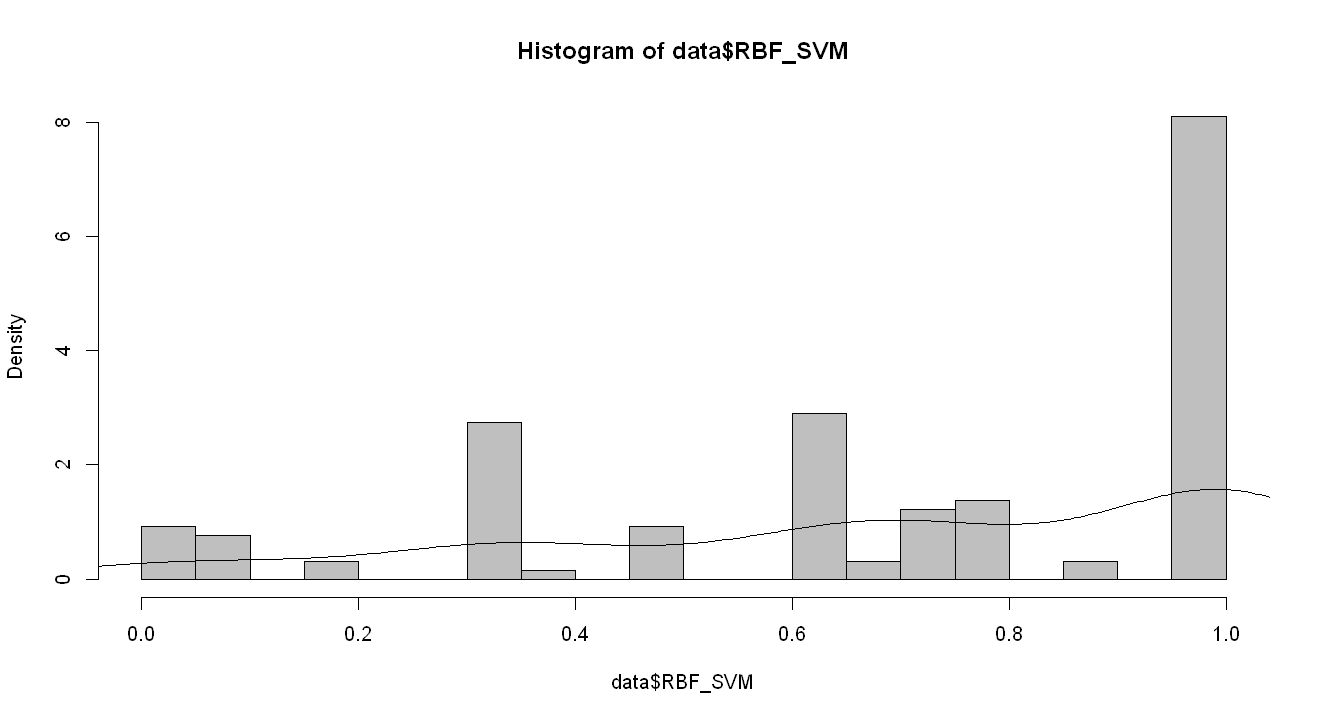

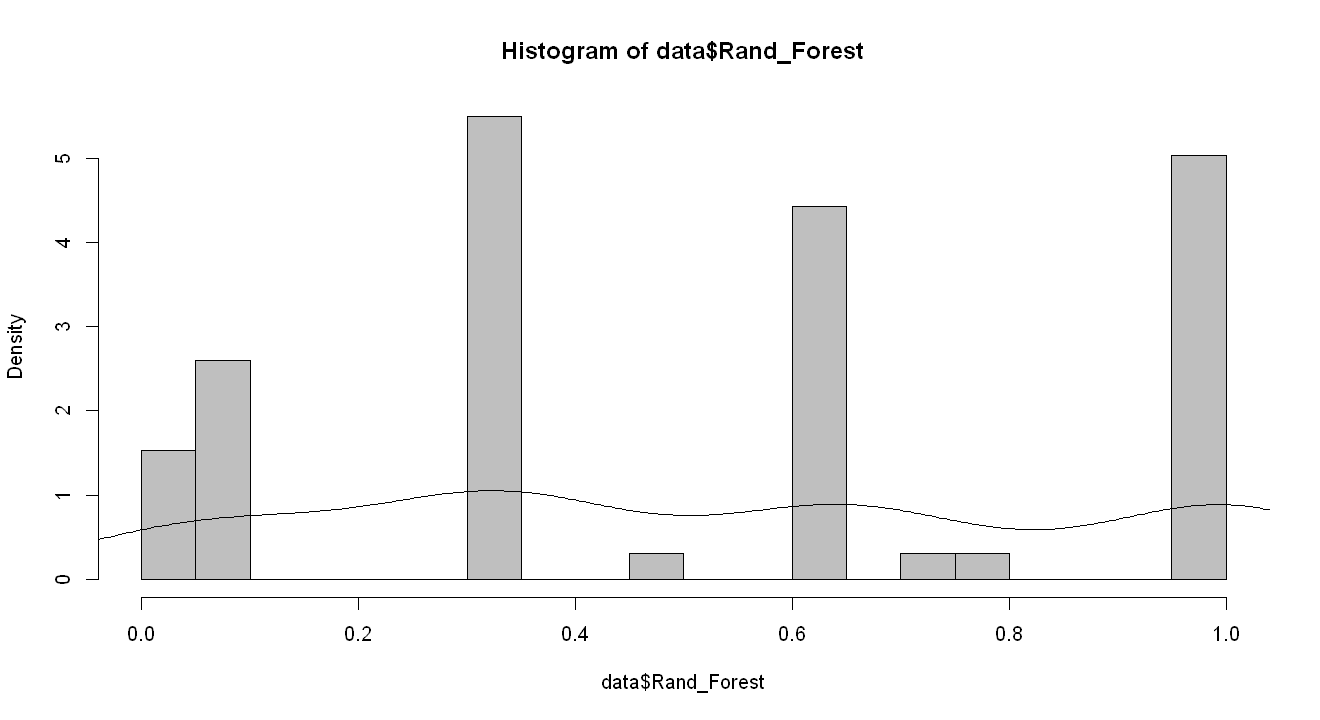

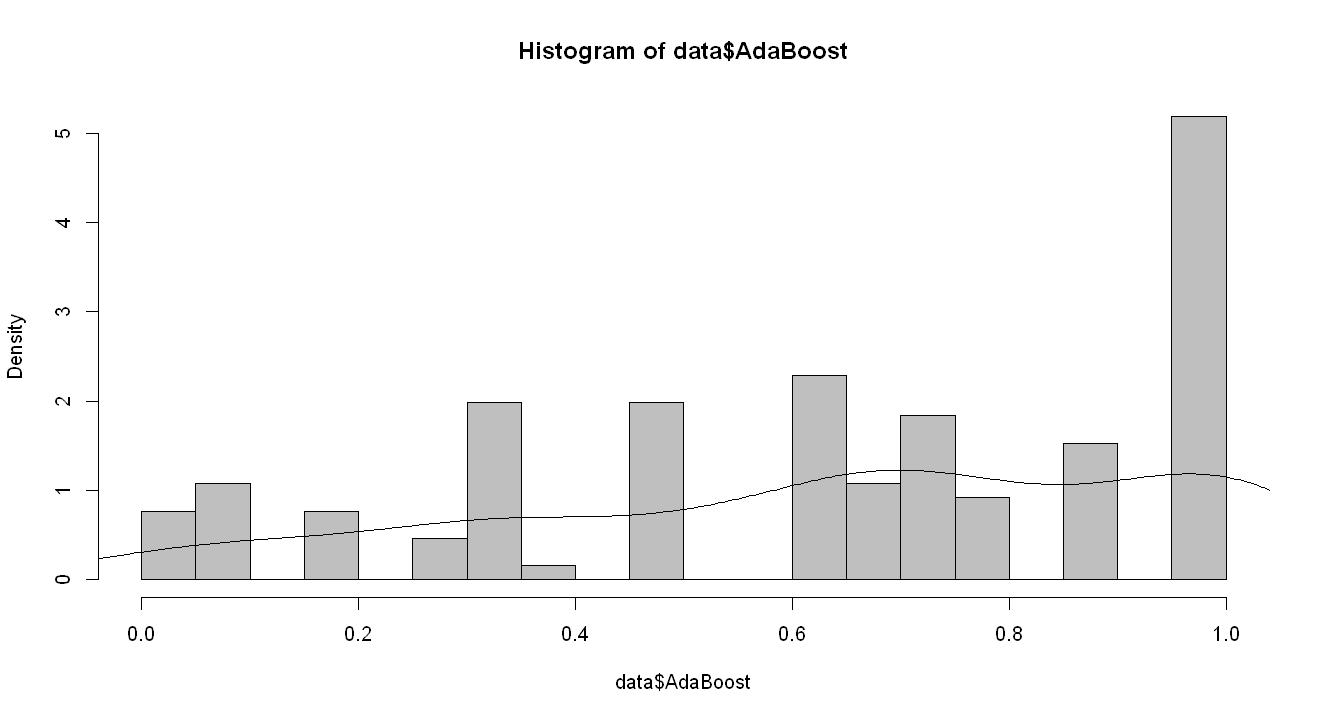

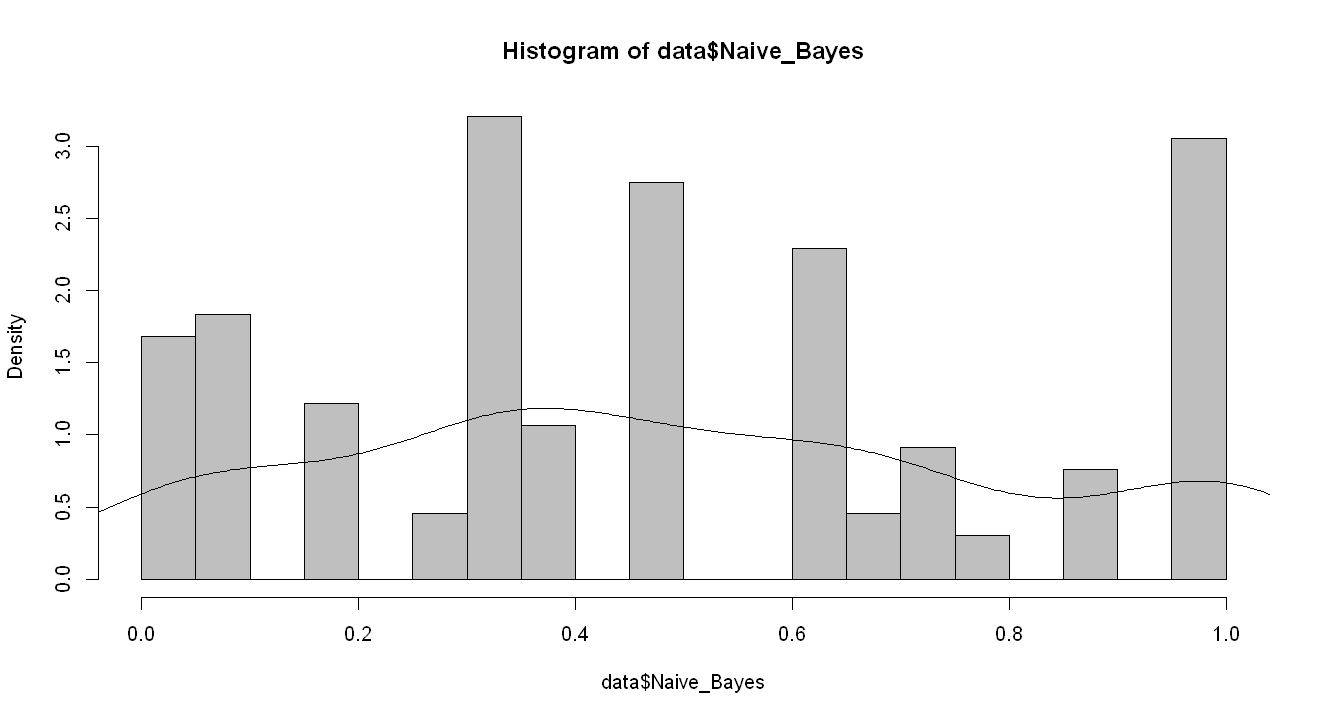

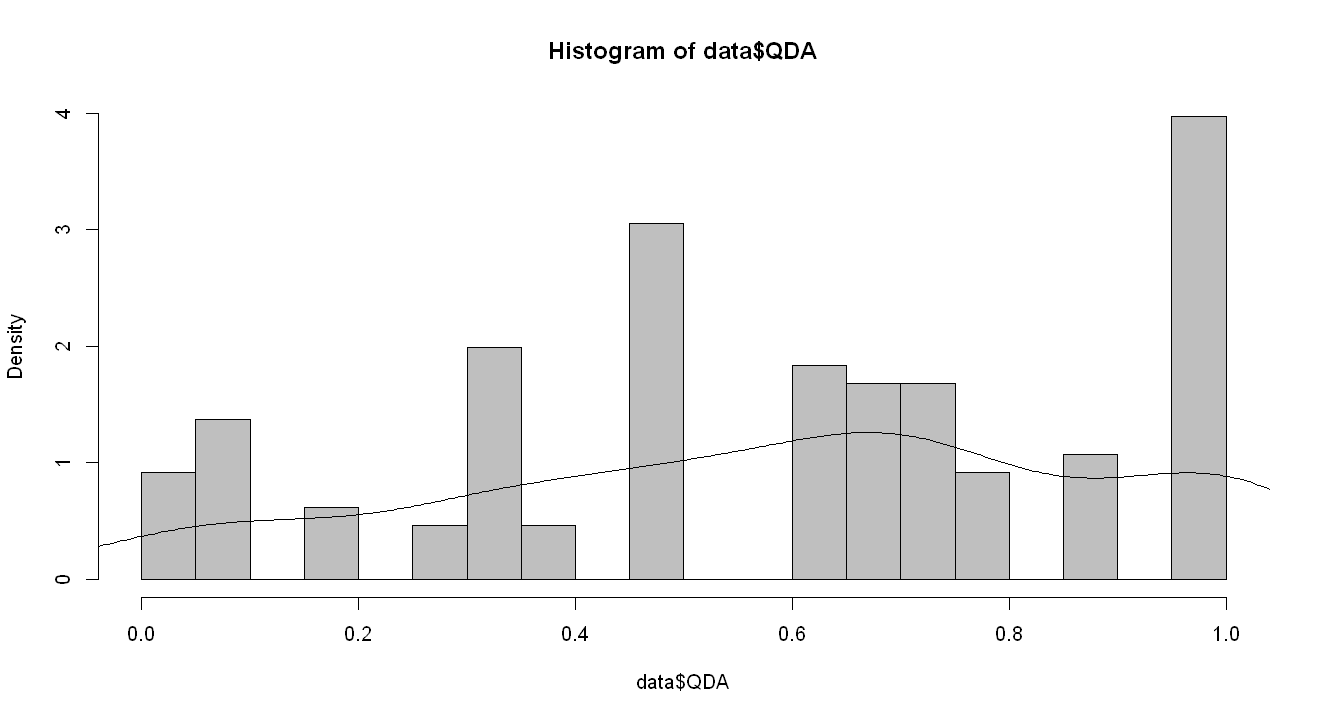

In [12]:
n_segm=20
hist(data$KNN, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$KNN))

hist(data$RBF_SVM, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$RBF_SVM))

hist(data$Rand_Forest, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$Rand_Forest))

hist(data$AdaBoost, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$AdaBoost))

hist(data$Naive_Bayes, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$Naive_Bayes))

hist(data$QDA, 
	col="gray75", 
	freq=FALSE,
	breaks=n_segm)
lines(density(data$QDA))



# ANOVA 6 grupos
[guía](http://www.sthda.com/english/wiki/one-way-anova-test-in-r)

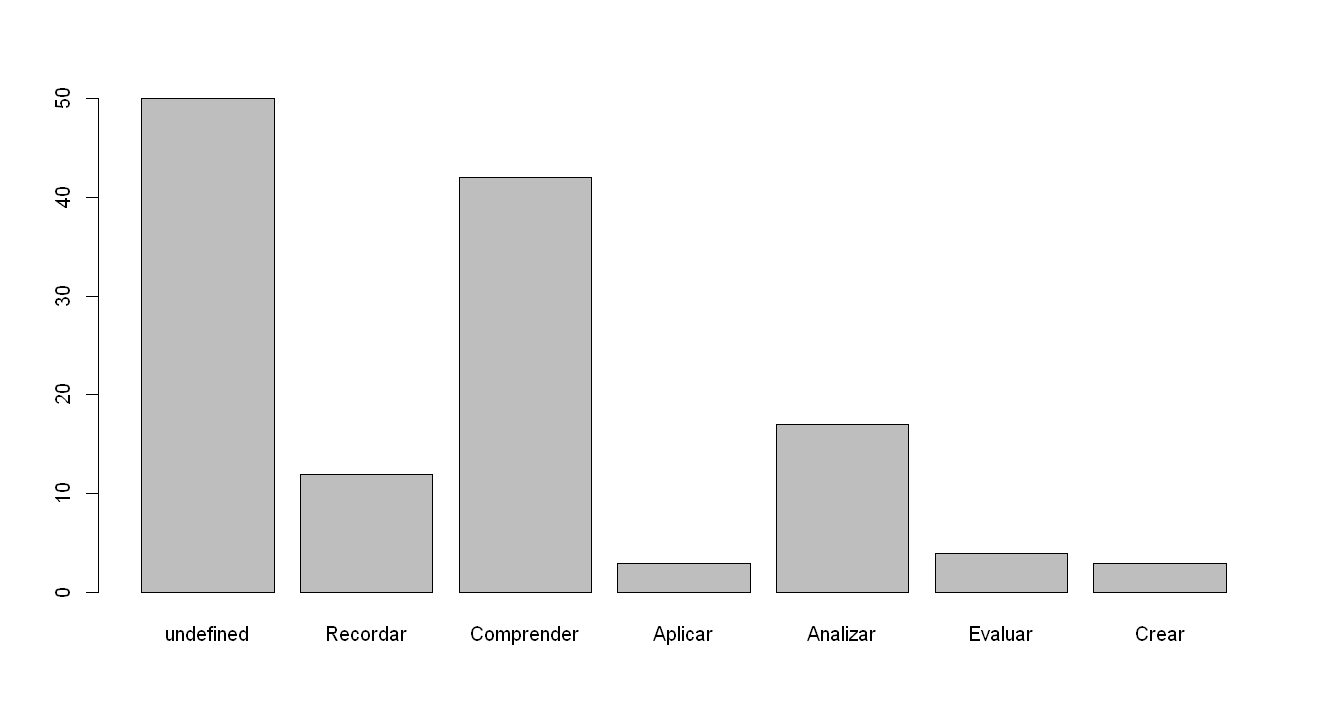

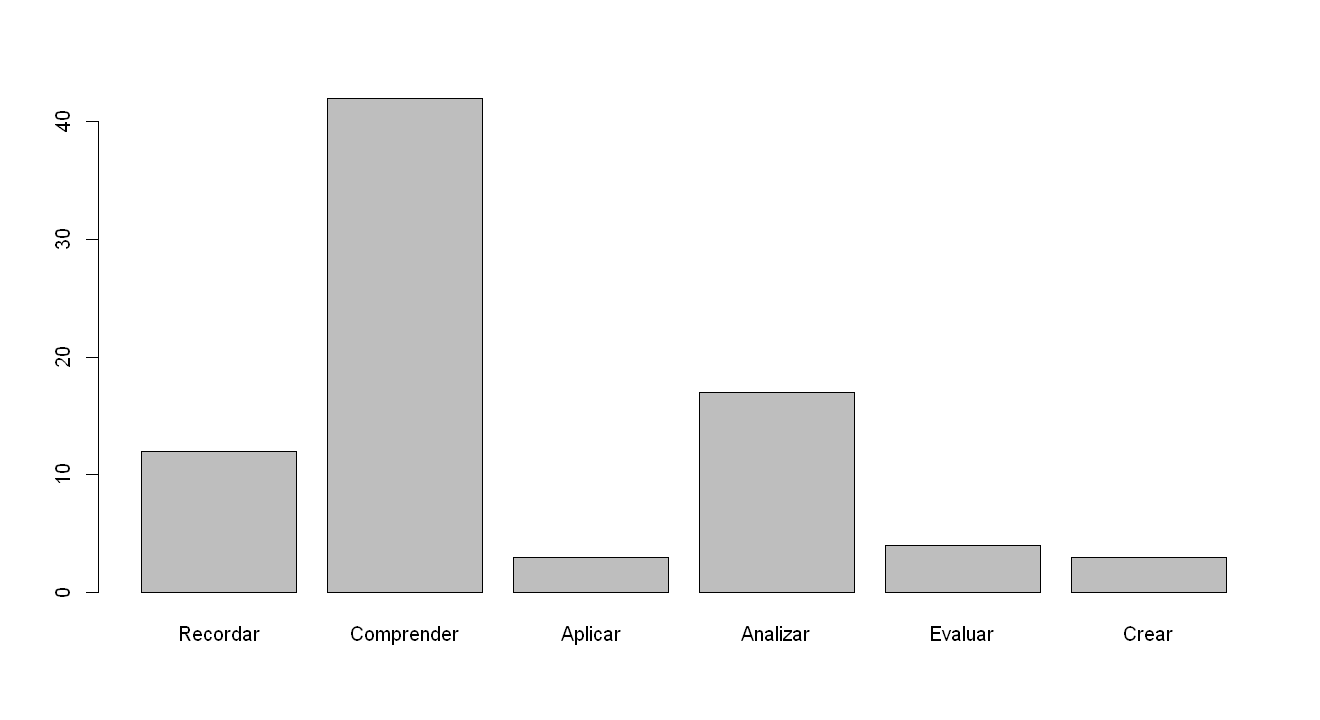

In [13]:
barplot(summary(data$process_6))
barplot(summary(data_6$process_6))

,Df,F value,Pr(>F)
group,5,0.4266297,0.828736
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.238 0.04753   0.493  0.781
Residuals   75  7.238 0.09651               

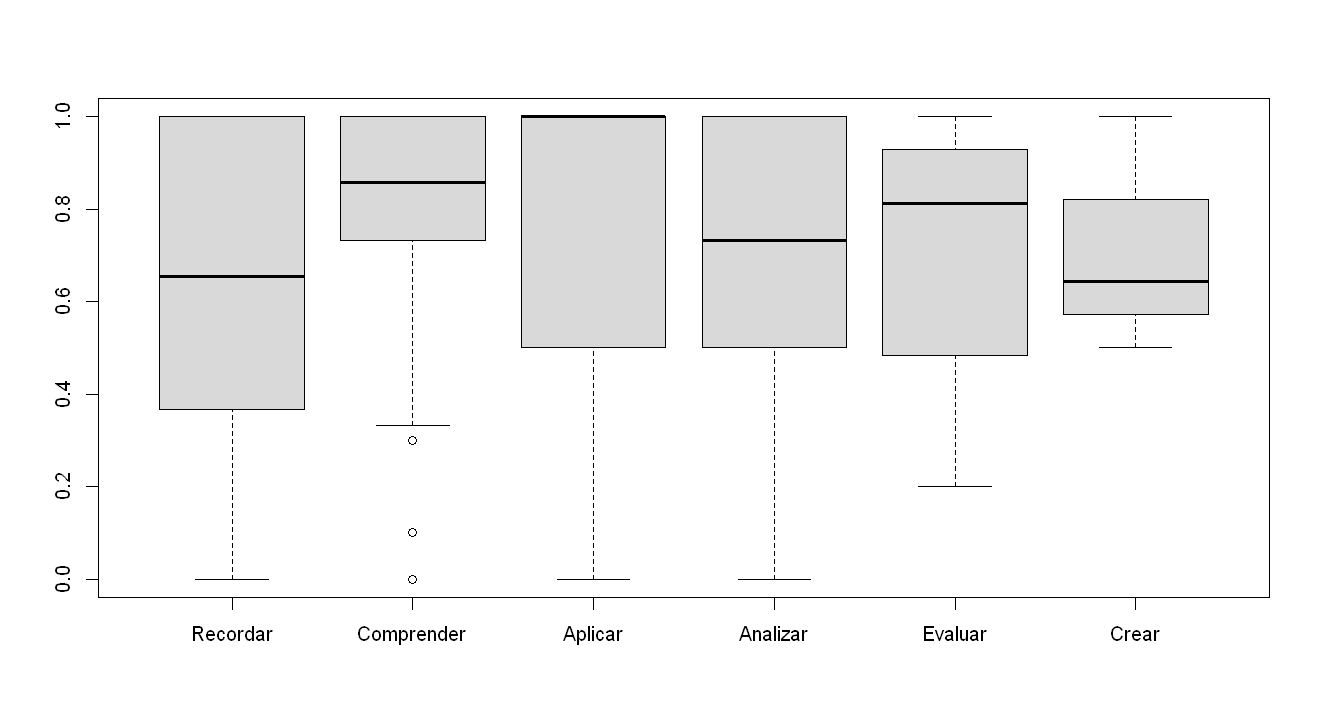

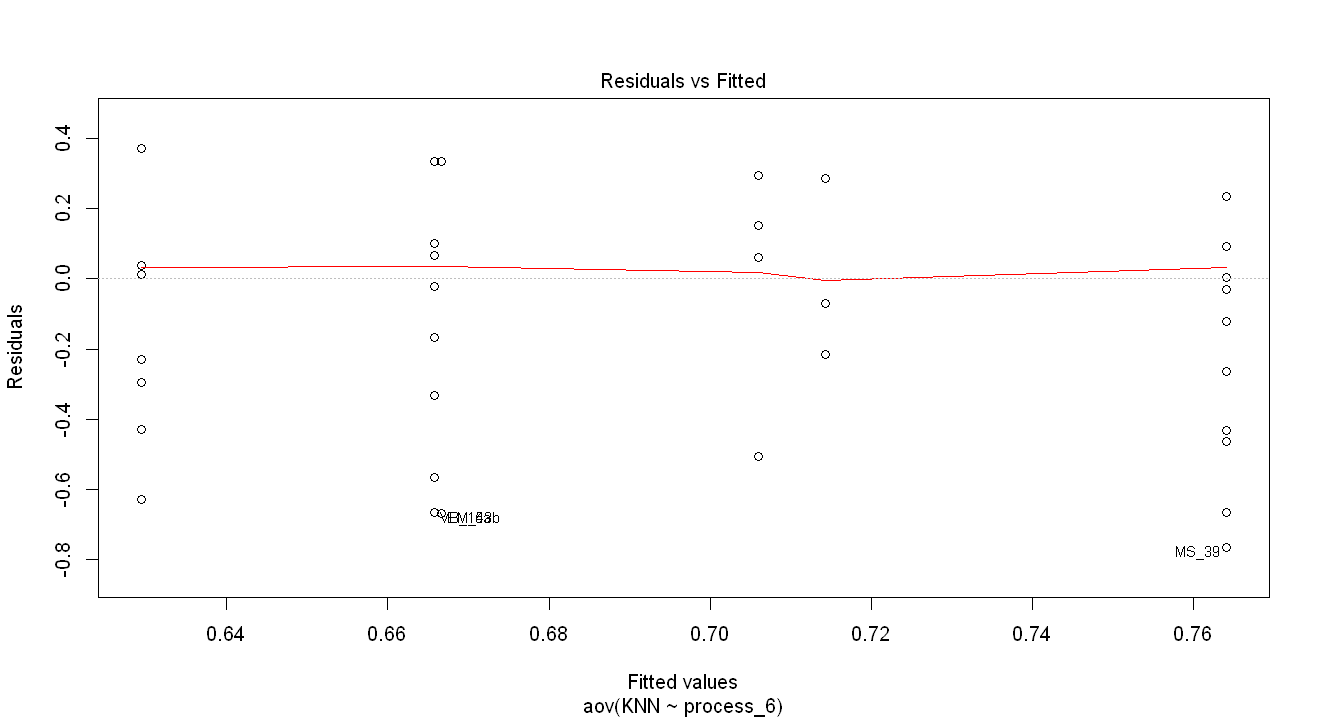

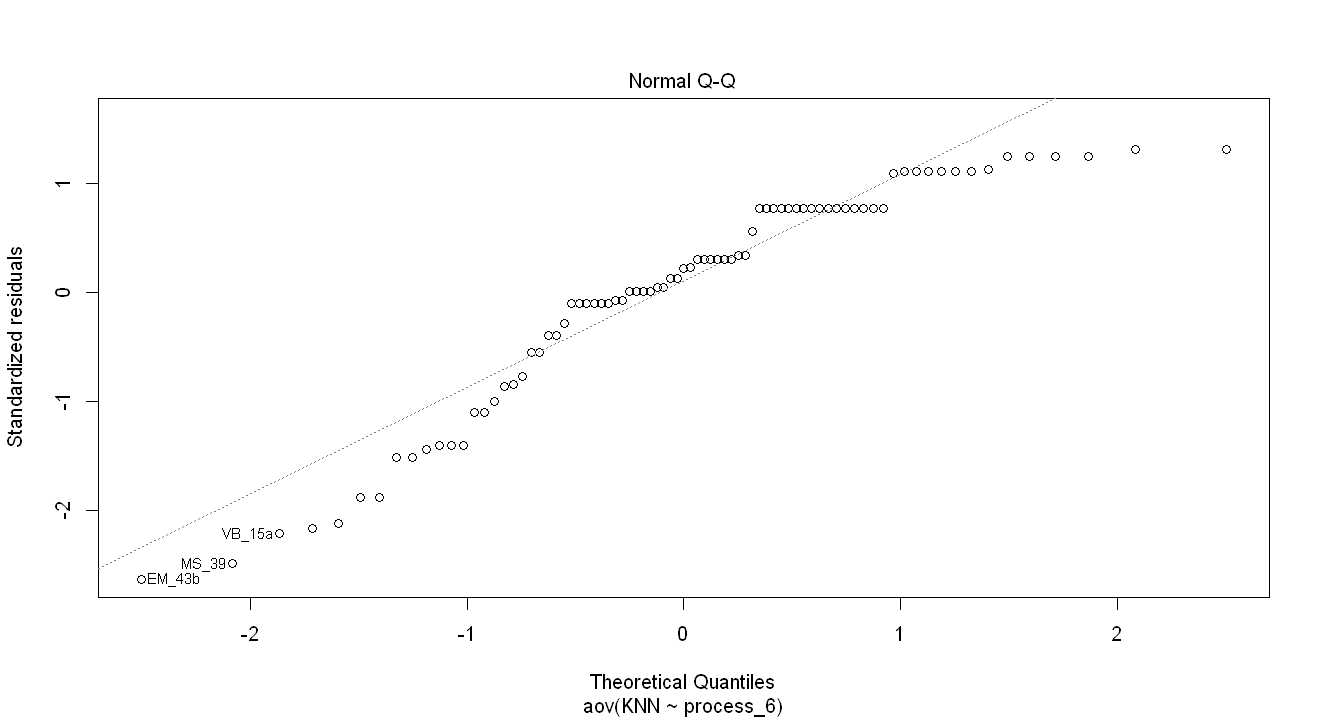

In [14]:
boxplot(KNN ~ process_6, data = data_6, col="gray85")
leveneTest(KNN ~ process_6, data = data_6)
aov_6_KNN <- aov(KNN ~ process_6, data = data_6)
summary(aov_6_KNN)
plot(aov_6_KNN, 1)
plot(aov_6_KNN, 2) 

,Df,F value,Pr(>F)
group,5,0.4677584,0.7990945
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.652  0.1303   1.373  0.244
Residuals   75  7.117  0.0949               

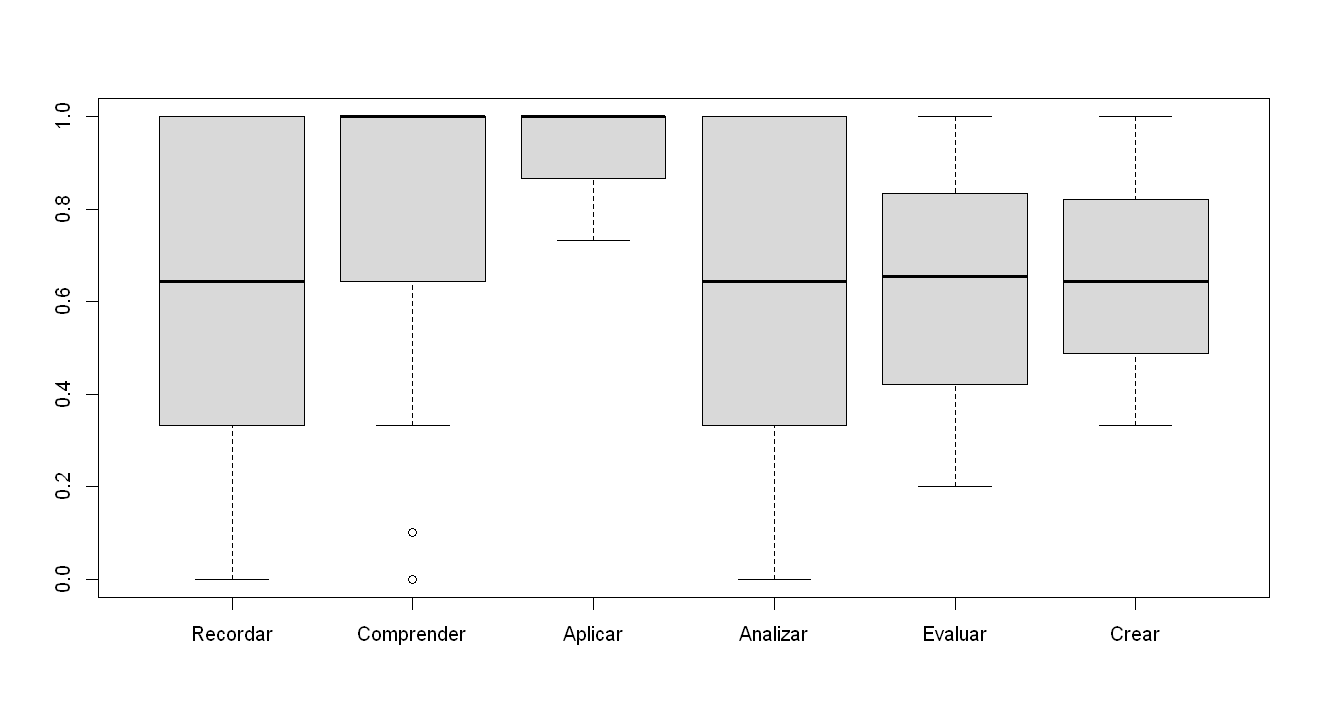

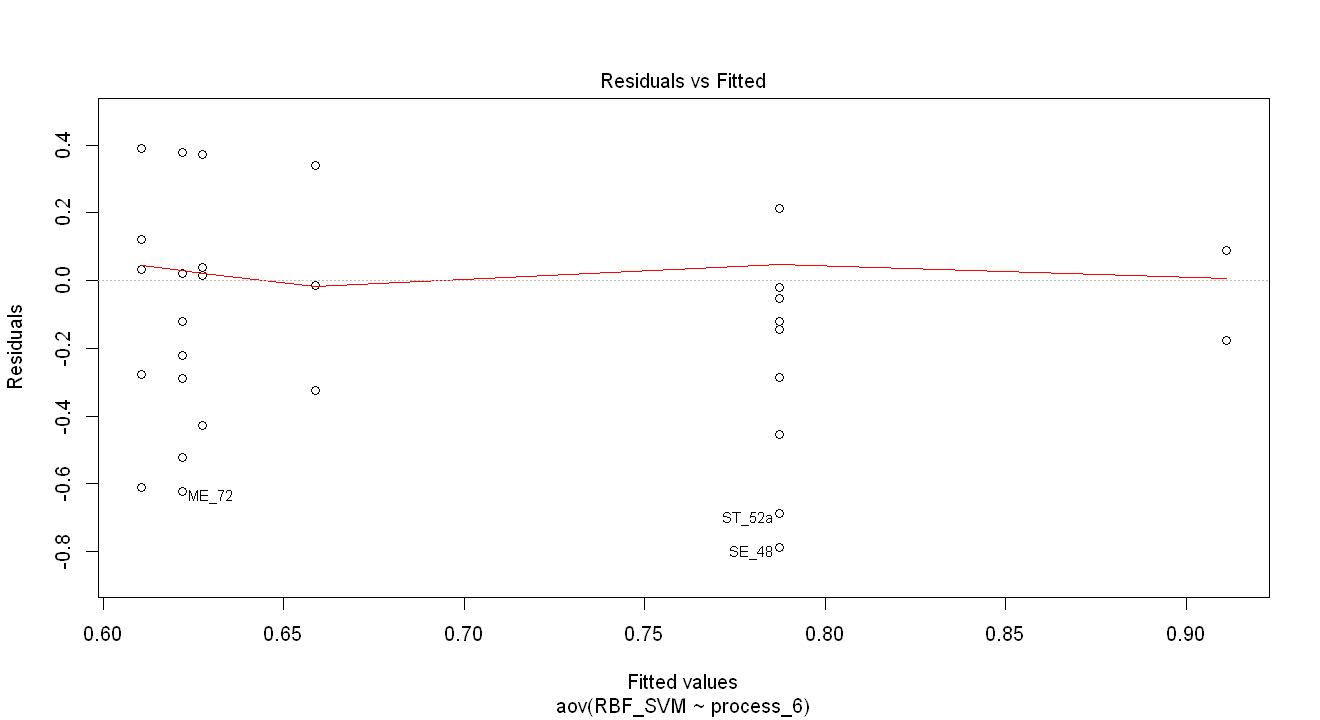

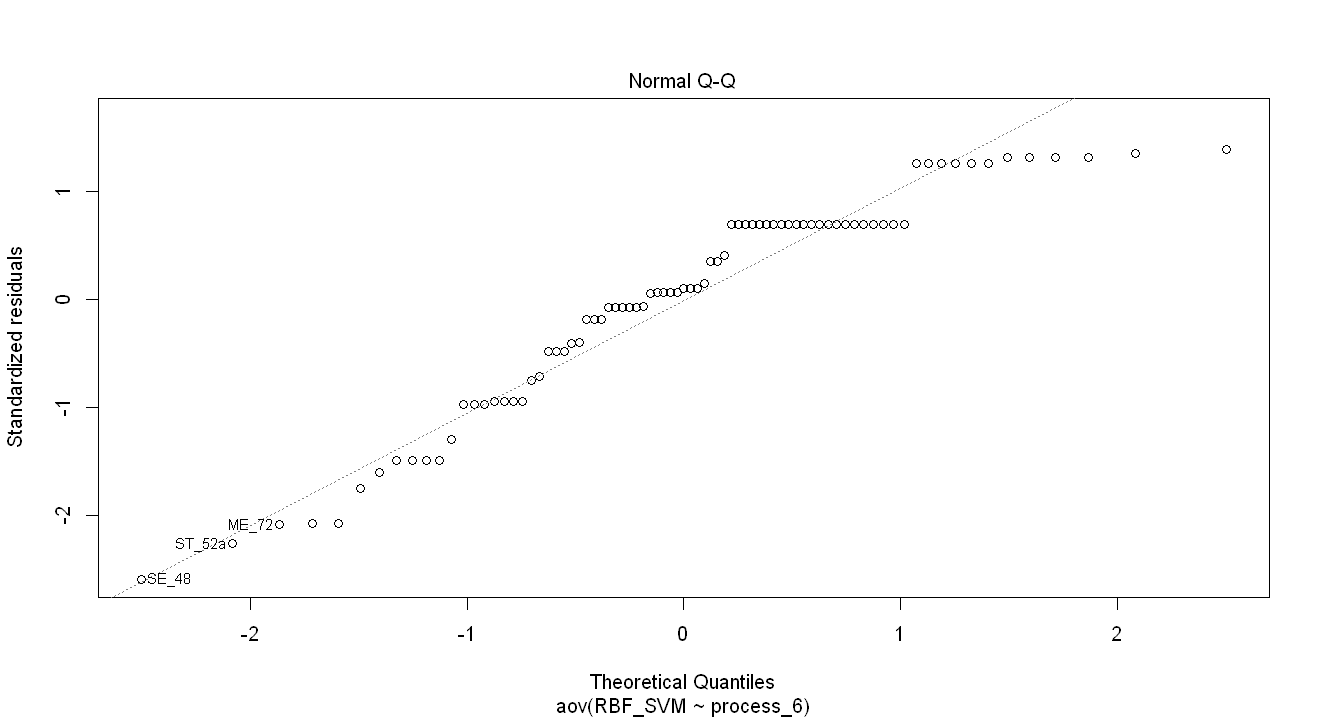

In [15]:
boxplot(RBF_SVM~ process_6, data = data_6, col="gray85")
leveneTest(RBF_SVM~ process_6, data = data_6)
aov_6_RBF_SVM<- aov(RBF_SVM~ process_6, data = data_6)
summary(aov_6_RBF_SVM)
plot(aov_6_RBF_SVM, 1)
plot(aov_6_RBF_SVM, 2) 


,Df,F value,Pr(>F)
group,5,0.2377552,0.9446055
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.158 0.03157    0.25  0.939
Residuals   75  9.482 0.12642               

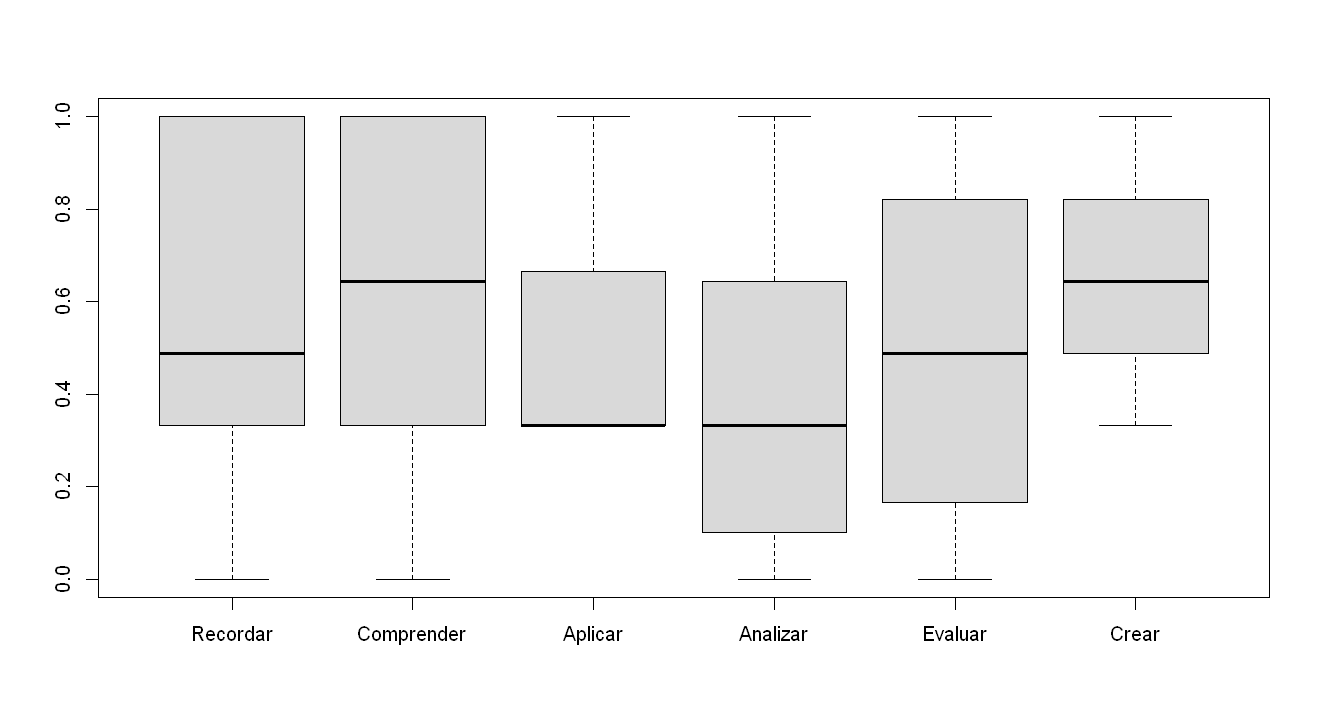

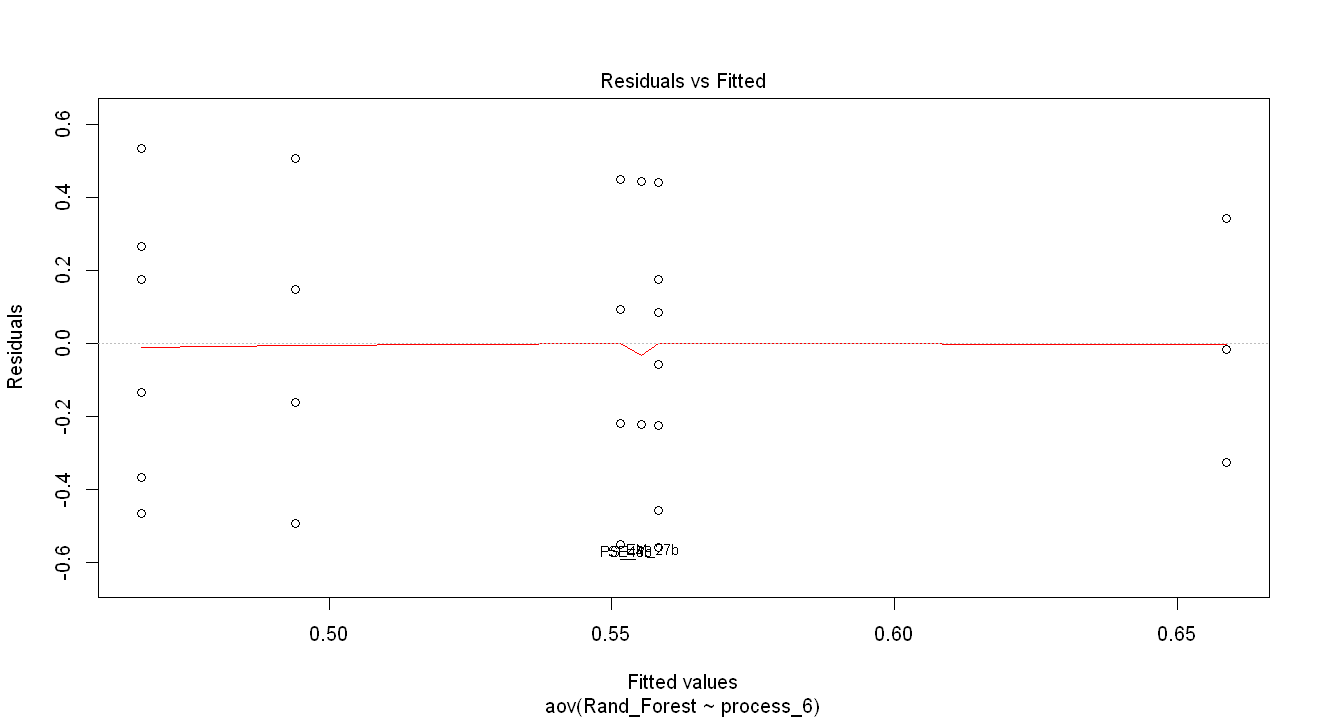

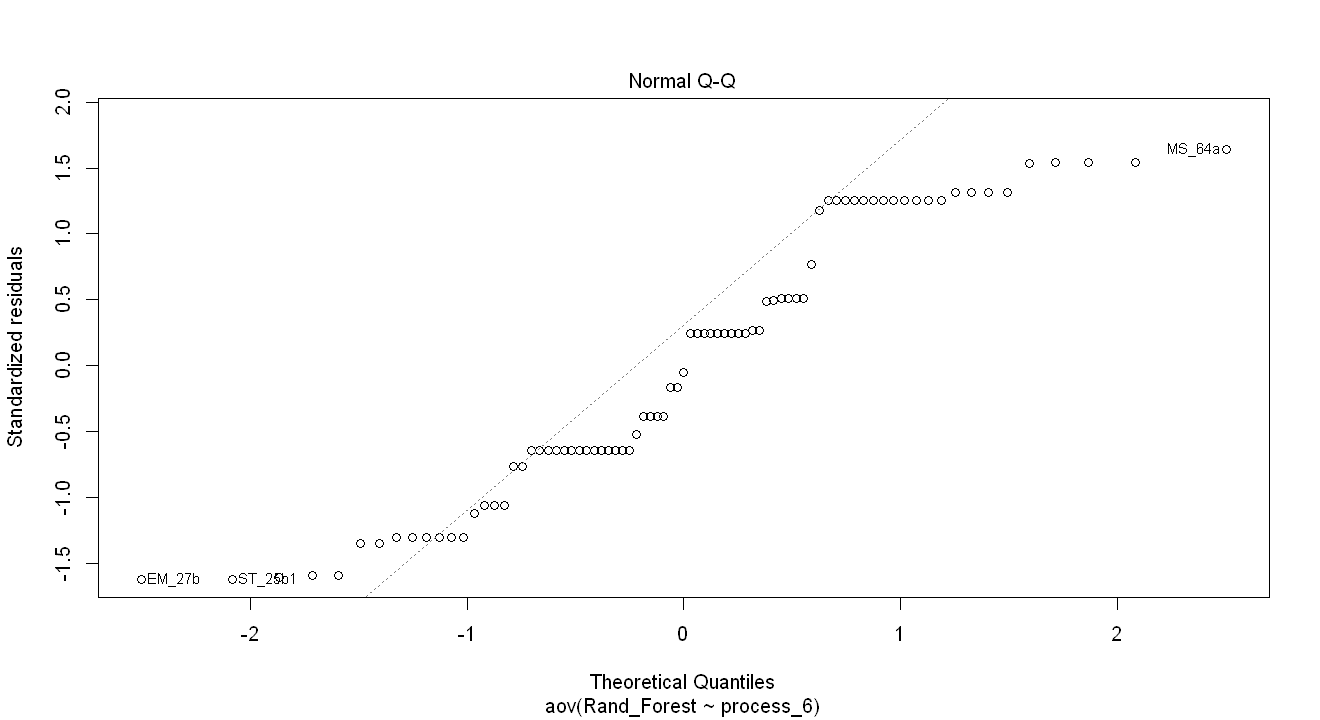

In [16]:
boxplot(Rand_Forest~ process_6, data = data_6, col="gray85")
leveneTest(Rand_Forest~ process_6, data = data_6)
aov_6_Rand_Forest<- aov(Rand_Forest~ process_6, data = data_6)
summary(aov_6_Rand_Forest)
plot(aov_6_Rand_Forest, 1)
plot(aov_6_Rand_Forest, 2) 

,Df,F value,Pr(>F)
group,5,1.893273,0.1055251
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.117 0.02335   0.248   0.94
Residuals   75  7.073 0.09431               

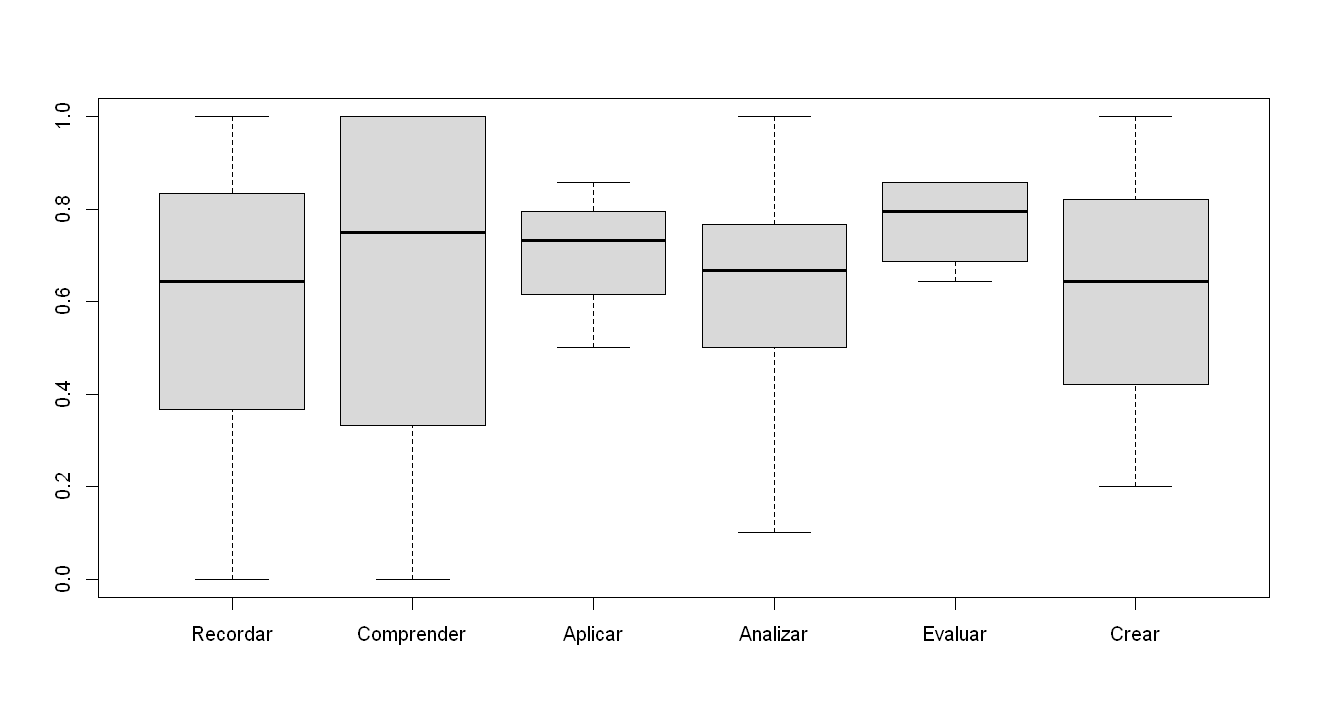

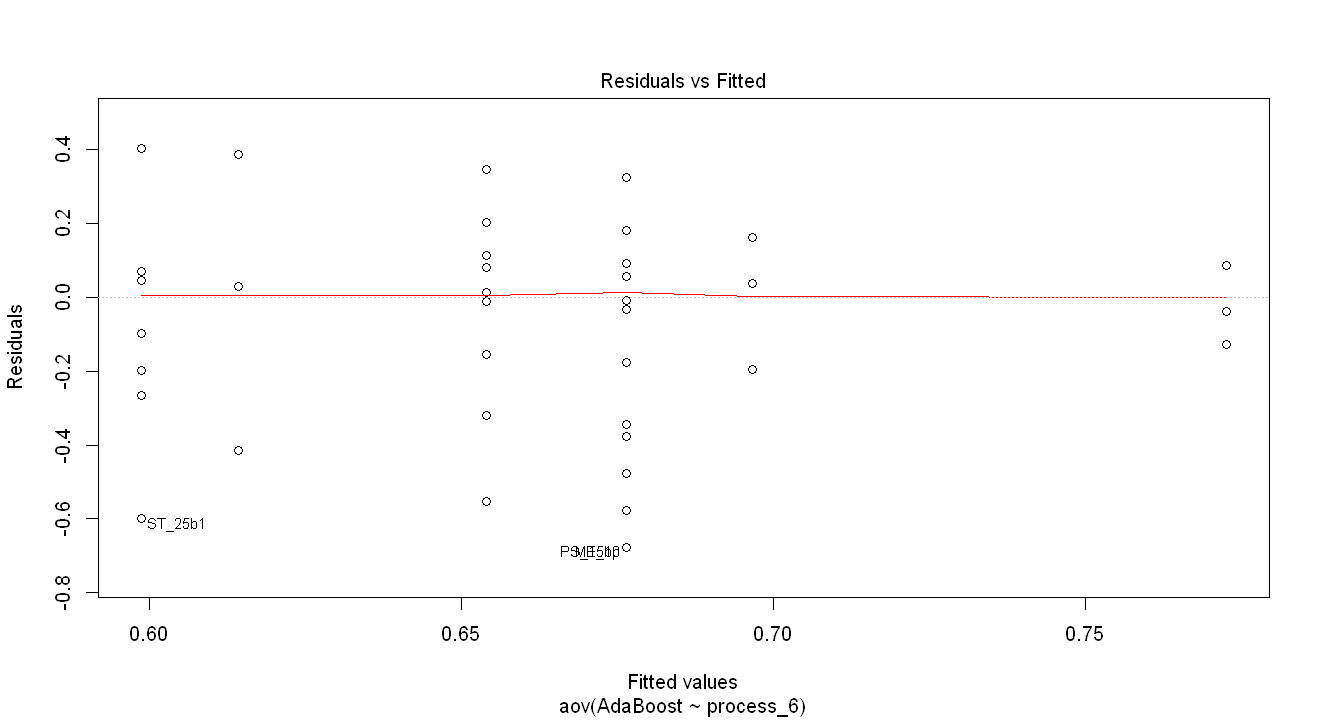

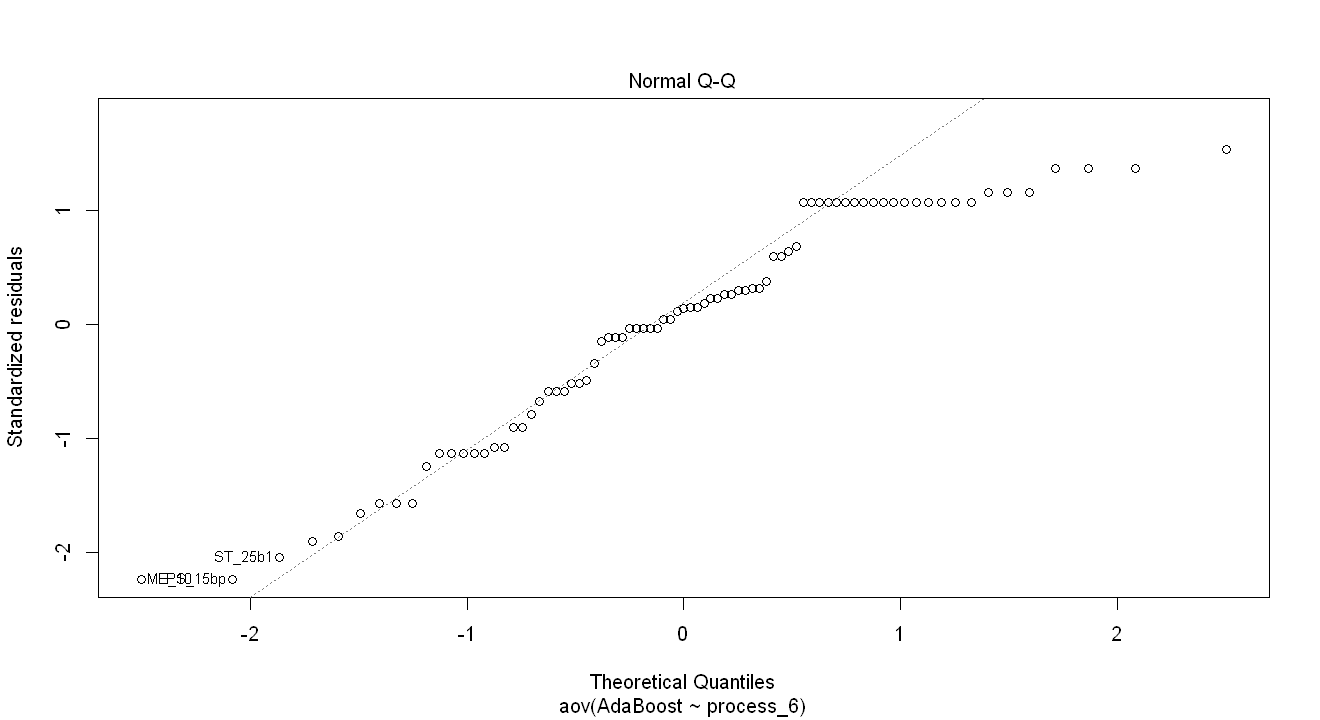

In [17]:
boxplot(AdaBoost~ process_6, data = data_6, col="gray85")
leveneTest(AdaBoost~ process_6, data = data_6)
aov_6_AdaBoost<- aov(AdaBoost~ process_6, data = data_6)
summary(aov_6_AdaBoost)
plot(aov_6_AdaBoost, 1)
plot(aov_6_AdaBoost, 2) 

,Df,F value,Pr(>F)
group,5,1.321606,0.2641875
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.546 0.10930   1.124  0.355
Residuals   75  7.295 0.09727               

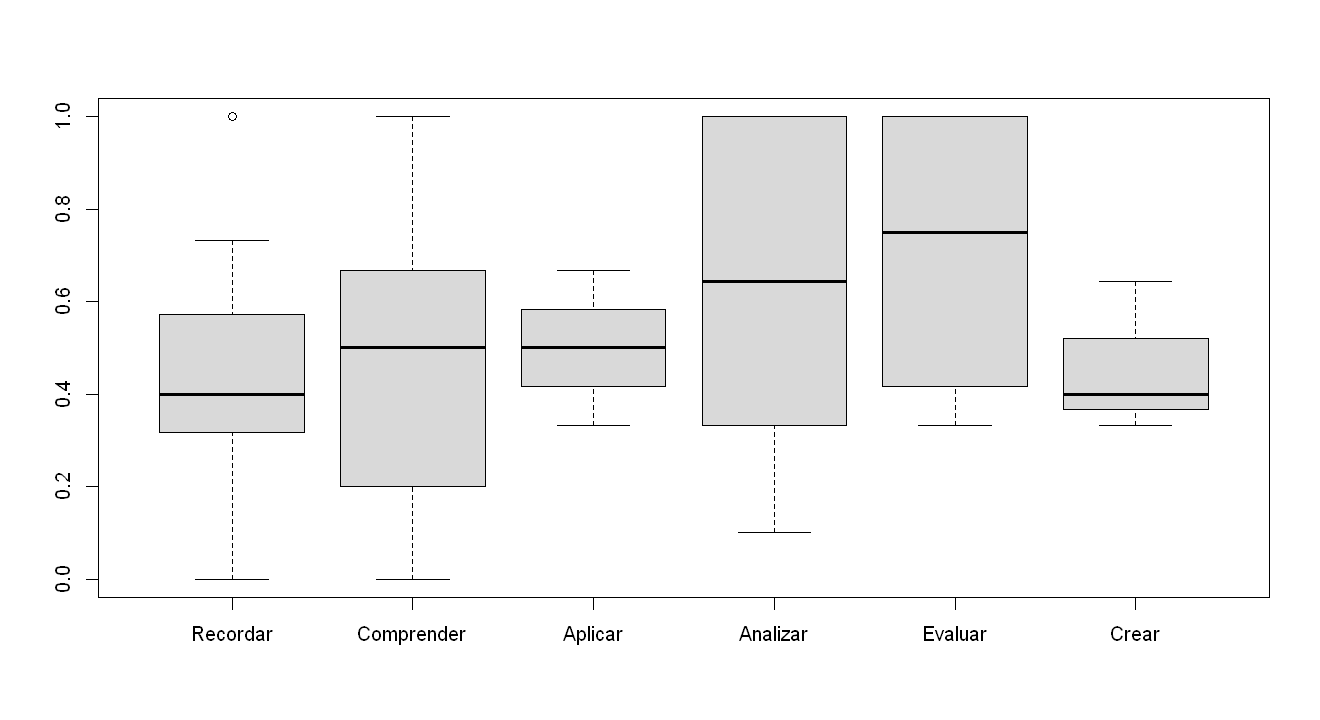

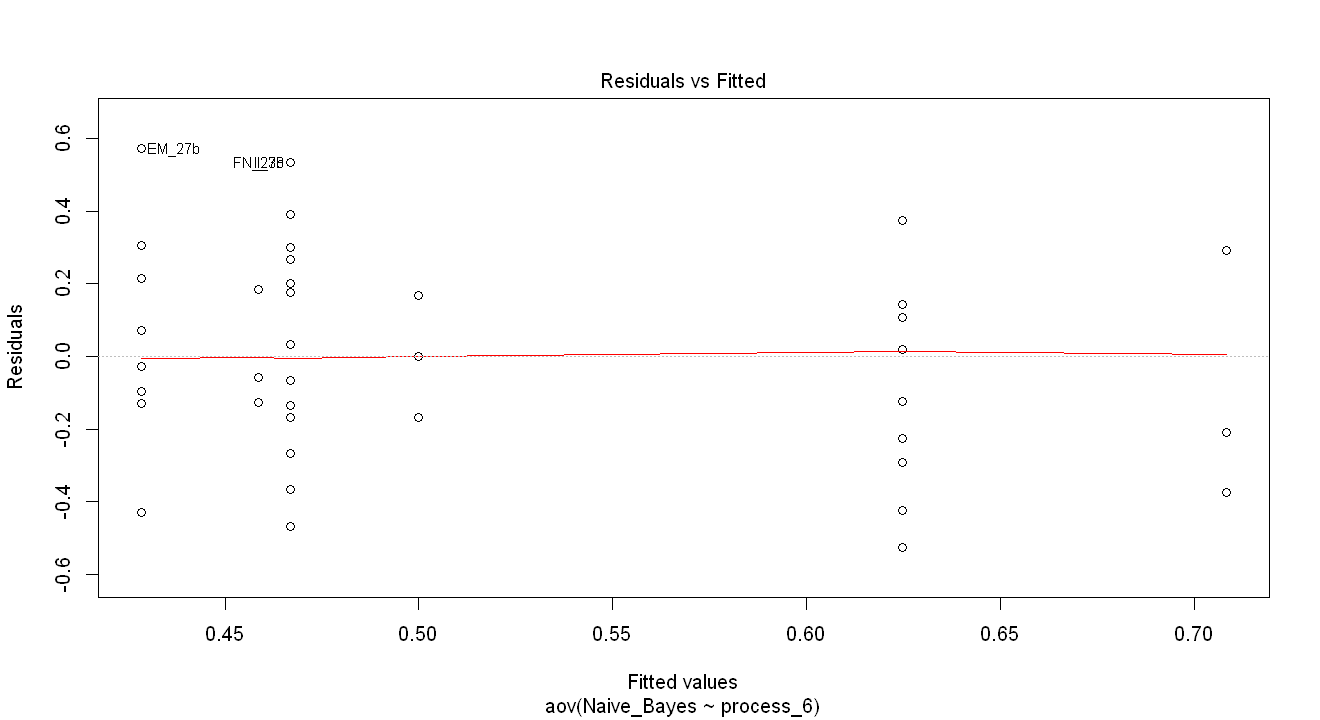

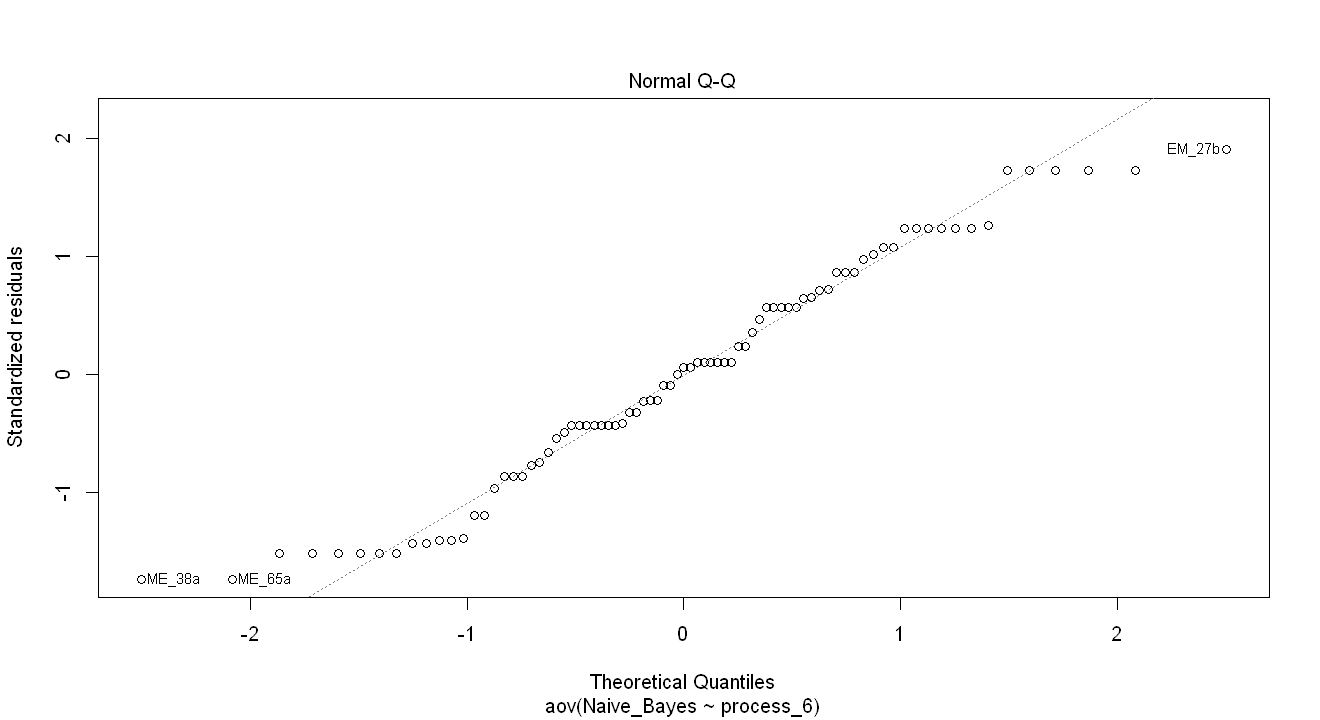

In [18]:
boxplot(Naive_Bayes ~ process_6, data = data_6, col="gray85")
leveneTest(Naive_Bayes ~ process_6, data = data_6)
aov_6_Naive_Bayes <- aov(Naive_Bayes ~ process_6, data = data_6)
summary(aov_6_Naive_Bayes)
plot(aov_6_Naive_Bayes, 1)
plot(aov_6_Naive_Bayes, 2) 


,Df,F value,Pr(>F)
group,5,0.7119673,0.6163342
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.231 0.04621   0.498  0.777
Residuals   75  6.953 0.09271               

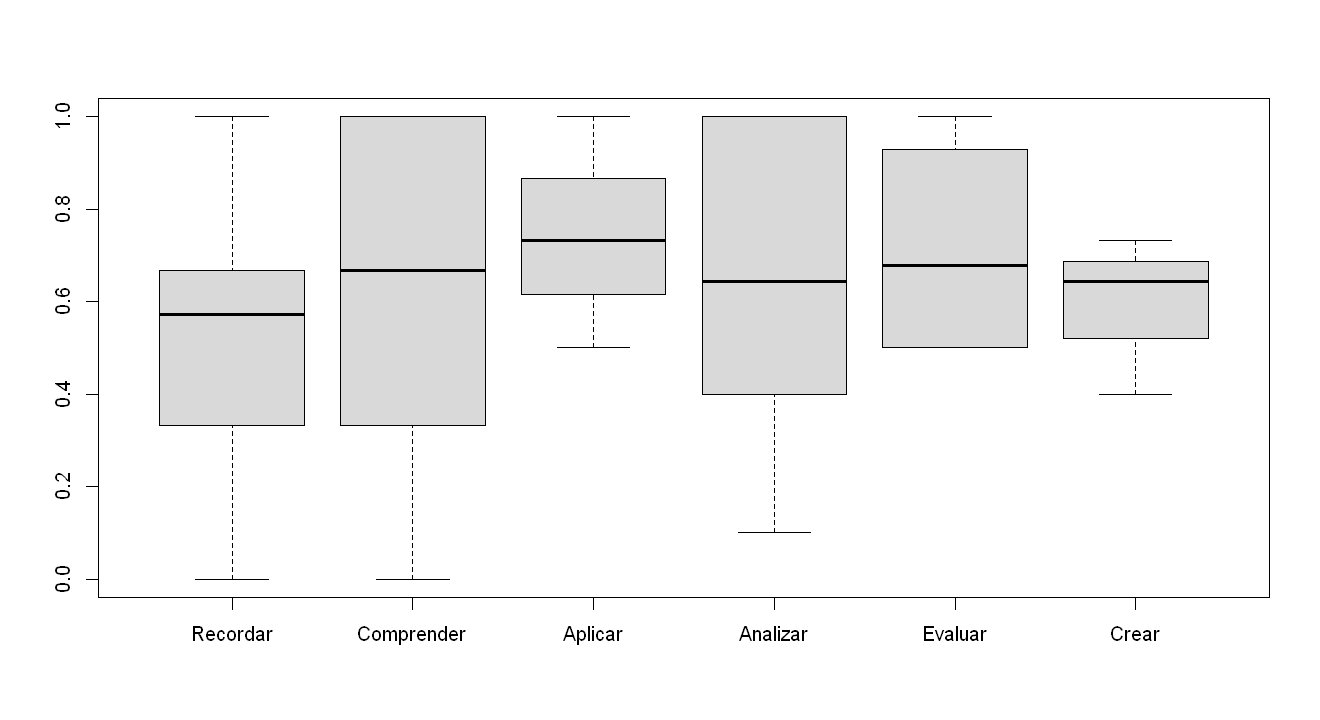

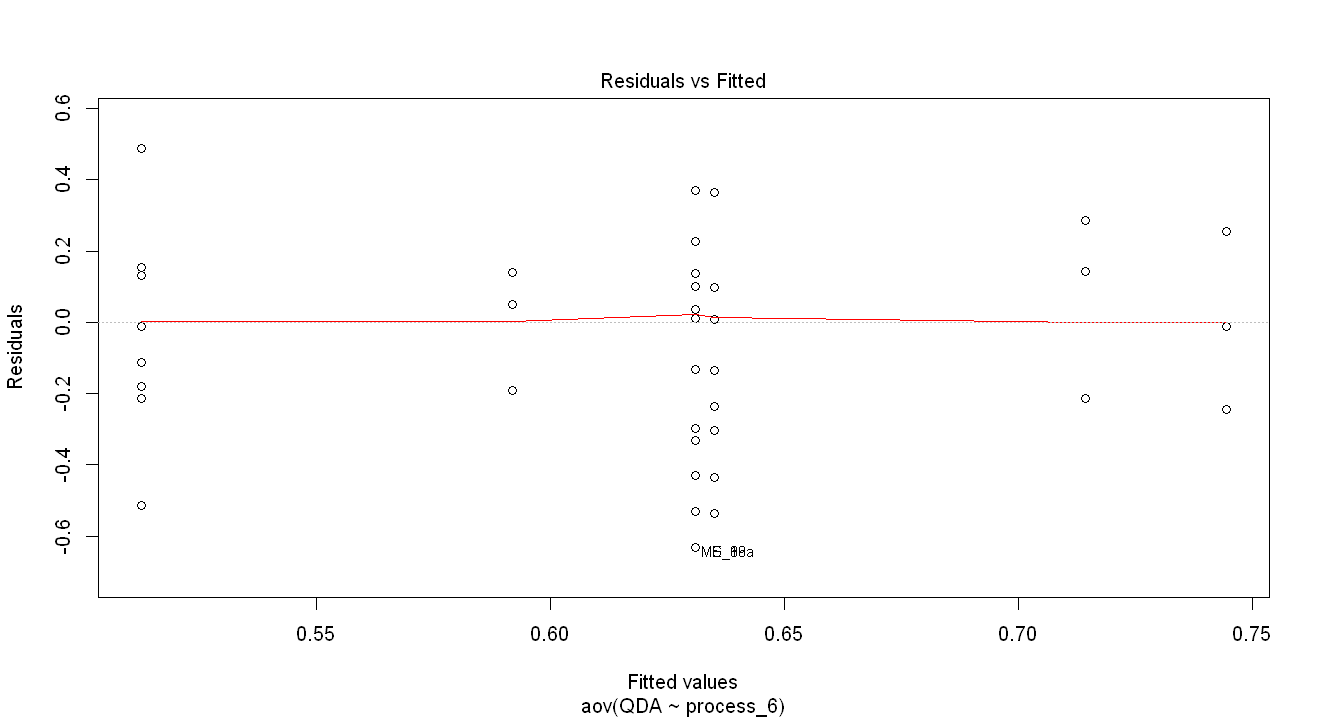

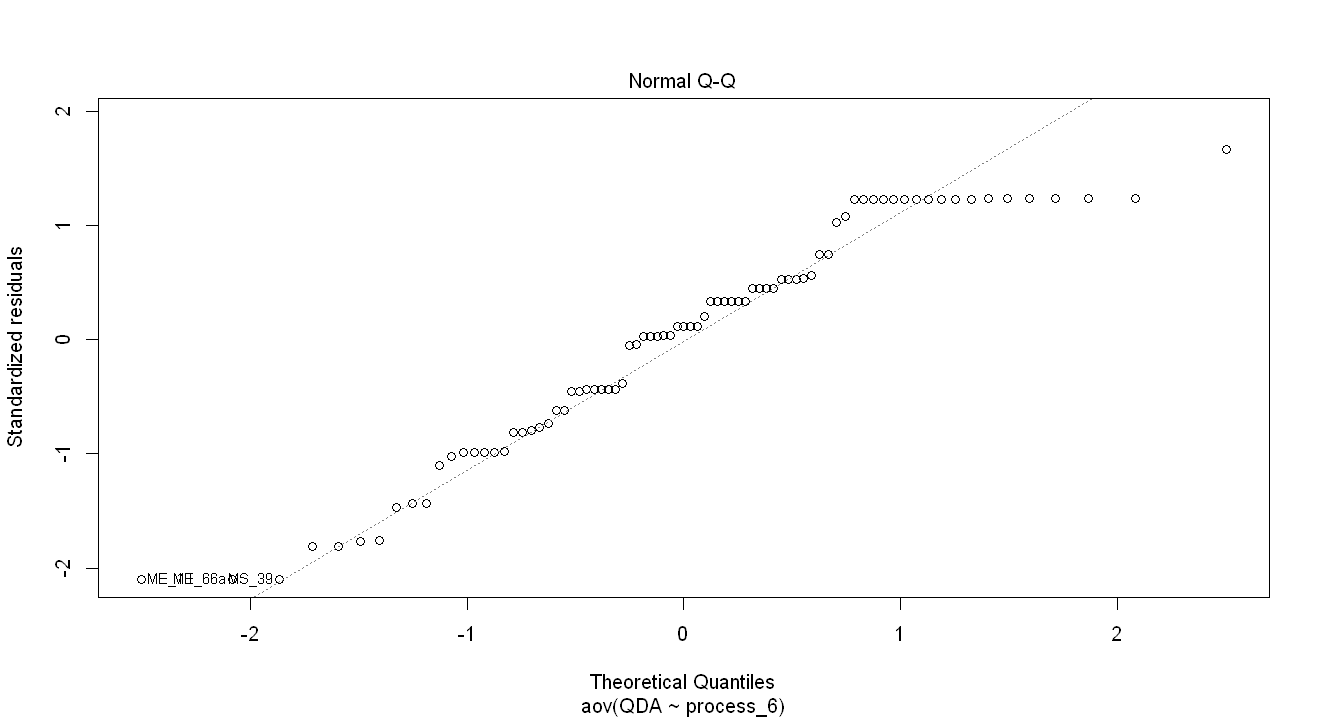

In [19]:
boxplot(QDA ~ process_6, data = data_6, col="gray85")
leveneTest(QDA ~ process_6, data = data_6)
aov_6_QDA <- aov(QDA ~ process_6, data = data_6)
summary(aov_6_QDA)
plot(aov_6_QDA, 1)
plot(aov_6_QDA, 2) 


### Abs IRT

In [20]:
cor.test(abs(data$IRT_difficulty), data$KNN)
cor.test(abs(data$IRT_difficulty), data$RBF_SVM)
cor.test(abs(data$IRT_difficulty), data$Rand_Forest)
cor.test(abs(data$IRT_difficulty), data$AdaBoost)
cor.test(abs(data$IRT_difficulty), data$Naive_Bayes)
cor.test(abs(data$IRT_difficulty), data$QDA)


	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$KNN
t = 0.2592, df = 129, p-value = 0.7959
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1492942  0.1935835
sample estimates:
       cor 
0.02281559 



	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$RBF_SVM
t = -0.076956, df = 129, p-value = 0.9388
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1780940  0.1649417
sample estimates:
         cor 
-0.006775442 



	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$Rand_Forest
t = 3.0183, df = 129, p-value = 0.003064
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08923612 0.41028186
sample estimates:
      cor 
0.2568305 



	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$AdaBoost
t = 1.2503, df = 129, p-value = 0.2134
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06328877  0.27577406
sample estimates:
      cor 
0.1094246 



	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$Naive_Bayes
t = 3.0535, df = 129, p-value = 0.002748
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09221017 0.41277274
sample estimates:
      cor 
0.2596293 



	Pearson's product-moment correlation

data:  abs(data$IRT_difficulty) and data$QDA
t = 1.4483, df = 129, p-value = 0.15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04603447  0.29168680
sample estimates:
      cor 
0.1264898 
